<center><img src="Logo.png" alt="logo"></center>

<h5 style="color:blue">
Presentado por el Alumno: Javier Edgar Esteban 
Ghithub: JavierEdgarEsteban77 
Carrera: DataScience Cohorte 05PT 02 Año 2.023</h5>

<h3 style="color:green">
Proyecto: Obtención del Minimum Viable Product (MUV) solicitado por la empresa Steam sobre la recomendación de videos juegos y optimización para usuarios: 'worried'</h3>

<h5 style="color:white">
Propuesta de Trabajo

En este notebook primero vamos a trabajar el Extract, Transform and Load (ETL) el cual trabajaremos el Rol de Data Engineer y posteriormente el 

Análisis Exploratorio de Datos (EDA).

La impronta que tendrá este trabajo individual desde el punto de vista técnico es extraer los datos en dónde trabajaremos los archivos:

steam_games.json; user__reviews.json y users_items.json

Cargo los datos de archivos JSON y los convierto en DataFrames de Pandas. Una vez transformados a nuestros df, estaremos en condición de la posterior preparación de la documentación para poder realizar un correcto análisis exploratorio que satisfaga las nececidades de nuestro cliente.

In [2]:
# Importo librerías.
import json
import pandas as pd
import ast
from tqdm import tqdm

# Creo la función para leer las líneas de cada dataset.
def leer_datos(ruta, tipo='json'):
    """
    Esta función lee datos desde cada archivo de mi carpeta y los convierte en un DataFrame de pandas.

    Args:
        ruta (str): La ruta al archivo que se va a leer.
        tipo (str, optional): El formato de los datos en el archivo. Puede ser 'json' o 'literal'. 
                              Si es 'json', los datos se cargarán utilizando json.loads. 
                              Si es 'literal', los datos se cargarán utilizando ast.literal_eval. 
                              Por defecto es 'json'.

    Returns:
        pd.DataFrame: Un DataFrame de pandas que contiene los datos leídos del archivo.
    """
    filas = []  # Será la lista para almacenar cada fila de datos

    # Abro el archivo en modo lectura con codificación utf-8

    with open(ruta, encoding='utf-8') as f:
        # Leo cada línea del archivo
        for line in tqdm(f.readlines(), desc=f"Leyendo {ruta}"):
            # Si el tipo es 'json', carga los datos con json.loads
            if tipo == 'json':
                data = json.loads(line)
            # Si el tipo es 'literal', carga los datos con ast.literal_eval
            elif tipo == 'literal':
                data = ast.literal_eval(line)
            # Añado los datos a la lista de filas
            filas.append(data)

    # Convierto la lista de filas en un DataFrame de pandas y lo devuelve.
    return pd.DataFrame(filas)

# Determino la ruta de cada dataset.
ruta_games = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Borrador PI_ML_OPS\Archivado Data\steam_games.json'
ruta_reviews = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Borrador PI_ML_OPS\Archivado Data\user_reviews.json'
ruta_items = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Borrador PI_ML_OPS\Archivado Data\users_items.json'

# Convierto en dataframe cada datasets
df_steam_games = leer_datos(ruta_games, tipo='json')
df_user_reviews = leer_datos(ruta_reviews, tipo='literal')
df_users_items = leer_datos(ruta_items, tipo='literal')

Leyendo C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Borrador PI_ML_OPS\Archivado Data\steam_games.json: 100%|██████████| 120445/120445 [00:01<00:00, 75483.53it/s]
Leyendo C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Borrador PI_ML_OPS\Archivado Data\user_reviews.json: 100%|██████████| 25799/25799 [00:03<00:00, 6650.89it/s]
Leyendo C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Borrador PI_ML_OPS\Archivado Data\users_items.json: 100%|██████████| 88310/88310 [03:33<00:00, 413.39it/s] 


<h3 style="color:green">
Nuestros dataframes se llaman: df_steam_games; df_user_reviews y df_users_items

<h5 style="color:blue">
Trabajaré son Steam Games

In [4]:
# Visualizo el contenido para poder analizar los pasos a seguir.
df_steam_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns"


In [5]:
print(f"""
El df_steam_games tiene {df_steam_games.shape[0]} filas y {df_steam_games.shape[1]} columnas.
Las columnas son: {df_steam_games.columns}
""")


El df_steam_games tiene 120445 filas y 13 columnas.
Las columnas son: Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'id',
       'developer'],
      dtype='object')



### Procederé a visualizar las columnas que contienen una lista o un diccionario.

In [6]:
# Importo librerías.
import pandas as pd

# Itero sobre cada columna
for column in df_steam_games.columns:
    # Obtengo el primer valor no nulo
    non_null_values = df_steam_games[column].dropna()
    if non_null_values.empty:
        print(f"La columna '{column}' solo contiene valores nulos.")
        continue
    first_non_null_value = non_null_values.iloc[0]

    # Compruebo si es una lista o un diccionario
    if isinstance(first_non_null_value, list):
        print(f"La columna '{column}' contiene una lista.")
    elif isinstance(first_non_null_value, dict):
        print(f"La columna '{column}' contiene un diccionario.")
    else:
        print(f"La columna '{column}' no contiene ni listas ni diccionarios.")

La columna 'publisher' no contiene ni listas ni diccionarios.
La columna 'genres' contiene una lista.
La columna 'app_name' no contiene ni listas ni diccionarios.
La columna 'title' no contiene ni listas ni diccionarios.
La columna 'url' no contiene ni listas ni diccionarios.
La columna 'release_date' no contiene ni listas ni diccionarios.
La columna 'tags' contiene una lista.
La columna 'reviews_url' no contiene ni listas ni diccionarios.
La columna 'specs' contiene una lista.
La columna 'price' no contiene ni listas ni diccionarios.
La columna 'early_access' no contiene ni listas ni diccionarios.
La columna 'id' no contiene ni listas ni diccionarios.
La columna 'developer' no contiene ni listas ni diccionarios.


### Desanido columnas que contienen listas creando variables ficticias con dumies para conocer su contenido.

In [7]:
# Importo librerías.
import pandas as pd

def desanidar_y_crear_dummies(df, column):
    """
    Esta función desanida la columna 'genres', 'tags' y 'specs' y crea variables ficticias.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a desanidar y crear variables ficticias.
    
    Retorna:
    df (pandas.DataFrame): El DataFrame con las nuevas columnas.
    new_columns (list): La lista de las nuevas columnas.
    """
    # Guardo las columnas originales
    original_columns = df.columns

    # Desanido la columna y creo  variables ficticias.
    df_dummies = df[column].str.join('|').str.get_dummies()

    # Concateno las variables ficticias al DataFrame original.
    df = pd.concat([df, df_dummies], axis=1)

    # Elimino la columna original.
    df = df.drop(column, axis=1)

    # Encuentro las nuevas columnas después del desanidado
    new_columns = [col for col in df.columns if col not in original_columns]

    return df, new_columns

# Uso de la función para columnas específicas
df_steam_games = df_steam_games  # aquí coloco el nombre del df y su nombre
columns = ['genres', 'tags', 'specs']  # aquí coloco los nombres de las columnas

for column in columns:
    df_steam_games, new_columns = desanidar_y_crear_dummies(df_steam_games, column)
    if column == 'genres':
        new_columns_genres = new_columns
    elif column == 'tags':
        new_columns_tags = new_columns
    elif column == 'specs':
        new_columns_specs = new_columns

print(f"""
El df_steam_games tiene {df_steam_games.shape[0]} filas y {df_steam_games.shape[1]} columnas.
Las columnas son: {df_steam_games.columns}

Nuevas columnas para 'genres': {new_columns_genres}
Nuevas columnas para 'tags': {new_columns_tags}
Nuevas columnas para 'specs': {new_columns_specs}
""")


El df_steam_games tiene 120445 filas y 411 columnas.
Las columnas son: Index(['publisher', 'app_name', 'title', 'url', 'release_date', 'reviews_url',
       'price', 'early_access', 'id', 'developer',
       ...
       'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards',
       'Steam Trading Cards', 'Steam Turn Notifications', 'Steam Workshop',
       'SteamVR Collectibles', 'Tracked Motion Controllers',
       'Valve Anti-Cheat enabled', 'Windows Mixed Reality'],
      dtype='object', length=411)

Nuevas columnas para 'genres': ['Accounting', 'Action', 'Adventure', 'Animation &amp; Modeling', 'Audio Production', 'Casual', 'Design &amp; Illustration', 'Early Access', 'Education', 'Free to Play', 'Indie', 'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation', 'Software Training', 'Sports', 'Strategy', 'Utilities', 'Video Production', 'Web Publishing']
Nuevas columnas para 'tags': ['1980s', "1990's", '2.5D', '2D', '2D Fighter', '360 Video', '3D Platformer', '3D 

#### Normalizo mi df_steam_games eliminando filas vacías, NaN y analizaremos en porcentajes cuántos datos nulos o vacíos representan en el total del df y desanidando 'genres'.

In [8]:
# Importo librerías.
import pandas as pd

# Guardo el número de filas antes de la eliminación.
num_rows_before = df_steam_games.shape[0]

# Imprimo los tipos de datos por columna y cantidad de nulos.
print("Tipos de datos por columna y cantidad de nulos:")
print(df_steam_games.dtypes)
print(df_steam_games.isnull().sum())

# Elimino las filas donde cualquier valor es NaN
print("Eliminando filas con valores nulos...")
df_steam_games = df_steam_games.dropna(how='any').reset_index(drop=True)

# Reseteo el índice del DataFrame
print("Reseteando el índice del DataFrame...")
df_steam_games.reset_index(drop=True, inplace=True)

# Guardo el número de filas después de la eliminación
num_rows_after = df_steam_games.shape[0]

# Calculo la reducción porcentual
reduction_percentage = (1 - num_rows_after / num_rows_before) * 100

# Imprimo la reducción porcentual
print(f"La reducción de filas es aproximadamente del {reduction_percentage:.2f}%.")

# Verifico los tipos de datos por columna.
print("Tipos de datos por columna después de la eliminación:")
print(df_steam_games.dtypes)

# Reviso las columnas
for col in df_steam_games.columns:
    print(f"Columna: {col}")
    print(f"Primer valor: {df_steam_games[col].iloc[0]}")

    # Convierto las listas a cadenas antes de llamar a unique()
    unique_values = pd.Series([str(x) if isinstance(x, list) else x for x in df_steam_games[col]]).unique()
    print(f"Valores únicos: {unique_values}\n")

Tipos de datos por columna y cantidad de nulos:
publisher                     object
app_name                      object
title                         object
url                           object
release_date                  object
                               ...  
Steam Workshop                 int64
SteamVR Collectibles           int64
Tracked Motion Controllers     int64
Valve Anti-Cheat enabled       int64
Windows Mixed Reality          int64
Length: 411, dtype: object
publisher                     96362
app_name                      88312
title                         90360
url                           88310
release_date                  90377
                              ...  
Steam Workshop                    0
SteamVR Collectibles              0
Tracked Motion Controllers        0
Valve Anti-Cheat enabled          0
Windows Mixed Reality             0
Length: 411, dtype: int64
Eliminando filas con valores nulos...
Reseteando el índice del DataFrame...
La reducción de fila

In [9]:
# Importo librerías.
import html

print("Normalizo los nombres de las columnas")

# Normalizo los nombres de las columnas
df_steam_games.columns = df_steam_games.columns.map(html.unescape)

# Recreo las listas 'new_columns_genres', 'new_columns_tags' y 'new_columns_specs' para reflejar los cambios en los nombres de las columnas
new_columns_genres = [col for col in df_steam_games.columns if col in new_columns_genres]
new_columns_tags = [col for col in df_steam_games.columns if col in new_columns_tags]
new_columns_specs = [col for col in df_steam_games.columns if col in new_columns_specs]

# Imprimo los nombres de las columnas y las nuevas columnas
print(f"""
Columnas del dataframe:
{df_steam_games.columns}

Nuevas columnas para 'genres':
{new_columns_genres}

Nuevas columnas para 'tags':
{new_columns_tags}

Nuevas columnas para 'specs':
{new_columns_specs}
""")


Normalizo los nombres de las columnas

Columnas del dataframe:
Index(['publisher', 'app_name', 'title', 'url', 'release_date', 'reviews_url',
       'price', 'early_access', 'id', 'developer',
       ...
       'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards',
       'Steam Trading Cards', 'Steam Turn Notifications', 'Steam Workshop',
       'SteamVR Collectibles', 'Tracked Motion Controllers',
       'Valve Anti-Cheat enabled', 'Windows Mixed Reality'],
      dtype='object', length=411)

Nuevas columnas para 'genres':
['Accounting', 'Action', 'Adventure', 'Audio Production', 'Casual', 'Early Access', 'Education', 'Free to Play', 'Indie', 'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation', 'Software Training', 'Sports', 'Strategy', 'Utilities', 'Video Production', 'Web Publishing', 'Action', 'Adventure', 'Audio Production', 'Casual', 'Early Access', 'Education', 'Free to Play', 'Indie', 'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation

### Elimino duplicados.

In [10]:
# Importo librerías.
import numpy as np

# Obtengo todas las columnas del DataFrame
all_columns = df_steam_games.columns.tolist()

# Aseguro que 'developer' esté en la lista de columnas a verificar
if 'developer' not in all_columns:
    all_columns.append('developer')

# Calculo el número de columnas a seleccionar (30% de todas las columnas)
num_columns_to_check = int(len(all_columns) * 0.3)

# Selecciono un subconjunto de columnas al azar
np.random.seed(0)  # Para reproducibilidad
columns_to_check = np.random.choice(all_columns, num_columns_to_check, replace=False)

# Imprimo el número de filas antes de la eliminación de duplicados
print("Número de filas antes de la eliminación de duplicados:", df_steam_games.shape[0])

# Elimino los duplicados del DataFrame
df_steam_games.drop_duplicates(subset=columns_to_check, keep='first', inplace=True)

# Imprimo el número de filas después de la eliminación de duplicados
print("Número de filas después de la eliminación de duplicados:", df_steam_games.shape[0])

# Imprimo las columnas que se usaron para verificar los duplicados
print("\nColumnas que se usaron para verificar los duplicados:")
print(columns_to_check)


Número de filas antes de la eliminación de duplicados: 22916
Número de filas después de la eliminación de duplicados: 22915

Columnas que se usaron para verificar los duplicados:
['Software' 'Card Game' 'Tower Defense' 'Violent' 'Space' 'Football'
 'Co-op' 'Accounting' 'Spectacle fighter' 'Time Manipulation' 'Foreign'
 'Spelling' 'Fighting' 'Hex Grid' 'Crafting' 'Tutorial' 'Video Production'
 'Turn-Based' 'Adventure' 'Turn-Based Tactics' 'Party-Based RPG' 'Gothic'
 'Arcade' 'Space Sim' 'First-Person' 'Relaxing' 'Includes level editor'
 'Flight' 'Puzzle' 'MOBA' '360 Video' 'FPS' 'Casual' 'Cartoony'
 'Real Time Tactics' 'Stats' 'Otome' 'Warhammer 40K' 'Visual Novel'
 'Local Multi-Player' 'CRPG' 'Investigation' 'Atmospheric' "Beat 'em up"
 'Underwater' 'Female Protagonist' 'Grand Strategy' 'price' 'app_name'
 'Stealth' 'Standing' 'Typing' 'Steam Workshop' 'Co-op' 'Audio Production'
 'Tactical' 'Downloadable Content' 'Exploration' 'Satire' 'Sandbox'
 'Gambling' 'Full controller support' 'A

In [11]:
# Verifico las filas duplicadas
duplicados = df_steam_games[df_steam_games.duplicated(subset='id', keep=False)]
print(duplicados)

Empty DataFrame
Columns: [publisher, app_name, title, url, release_date, reviews_url, price, early_access, id, developer, Accounting, Action, Adventure, Animation & Modeling, Audio Production, Casual, Design & Illustration, Early Access, Education, Free to Play, Indie, Massively Multiplayer, Photo Editing, RPG, Racing, Simulation, Software Training, Sports, Strategy, Utilities, Video Production, Web Publishing, 1980s, 1990's, 2.5D, 2D, 2D Fighter, 360 Video, 3D Platformer, 3D Vision, 4 Player Local, 4X, 6DOF, Abstract, Action, Action RPG, Action-Adventure, Adventure, Agriculture, Aliens, Alternate History, America, Animation & Modeling, Anime, Arcade, Arena Shooter, Artificial Intelligence, Assassin, Asynchronous Multiplayer, Atmospheric, Audio Production, Base Building, Based On A Novel, Basketball, Batman, Beat 'em up, Benchmark, Bikes, Blood, Board Game, Bowling, Building, Bullet Hell, Bullet Time, CRPG, Capitalism, Card Game, Cartoon, Cartoony, Casual, Character Action Game, Charac

### Graficaré para interpretar al contenido de 'genres' que se desanido, en este caso la frecuencia.

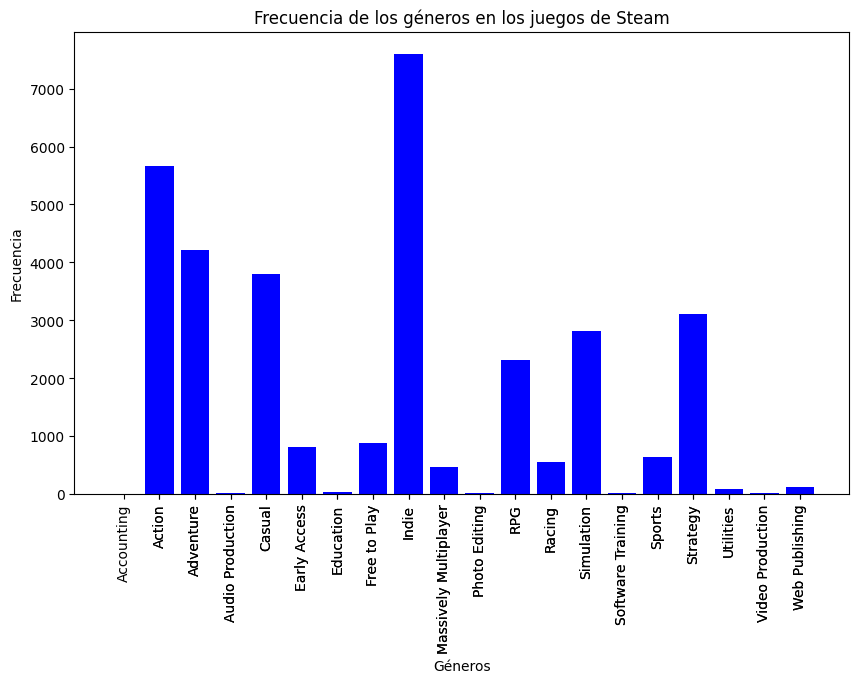

El gráfico muestra la frecuencia de los géneros en los juegos de Steam. Las barras representan el número de juegos de cada género.
El género más popular es **Indie**, con **7603** juegos.
Los géneros menos populares son **Accounting, Adventure, Audio Production, Casual, Early Access, Education, Free to Play, Massively Multiplayer, Photo Editing, RPG, Racing, Simulation, Software Training, Sports, Strategy, Utilities, Video Production, Web Publishing, Adventure, Audio Production, Casual, Early Access, Education, Free to Play, Massively Multiplayer, Photo Editing, RPG, Racing, Simulation, Software Training, Sports, Strategy, Utilities, Video Production, Web Publishing**, con menos de 5000 juegos cada uno.

**Tipología:** **Descripción
 objetiva


In [12]:
# Importo librerías.
import matplotlib.pyplot as plt
import textwrap

def generate_graph_and_description(df_steam_games):

    # Cuento la frecuencia de cada género.
    genre_counts = df_steam_games[new_columns_genres].sum()

    # Creo el gráfico de barras.
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(genre_counts.index, genre_counts.values, color='b')

    # Agrego etiquetas a los ejes.
    ax.set_xlabel('Géneros')
    ax.set_ylabel('Frecuencia')
    ax.set_title('Frecuencia de los géneros en los juegos de Steam')

    # Rotar las etiquetas del eje x para una mejor visualización.
    ax.set_xticks(genre_counts.index)  # Establece las posiciones de las etiquetas del eje x
    ax.set_xticklabels(genre_counts.index, rotation=90)  # Establece las etiquetas y la rotación

    # Obtenemos el género más popular.
    max_index = genre_counts.argmax()

    # Obtenemos los géneros menos populares.
    low_count_genres = genre_counts[genre_counts <= 5000]
    low_count_genres_names = low_count_genres.index.to_list()

    # Generamos la descripción del gráfico.
    response = f"El gráfico muestra la frecuencia de los géneros en los juegos de Steam. Las barras representan el número de juegos de cada género.\n"
    response += f"El género más popular es **{genre_counts.index[max_index]}**, con **{genre_counts.values[max_index]}** juegos.\n"
    response += f"Los géneros menos populares son **{', '.join(low_count_genres_names)}**, con menos de 5000 juegos cada uno."

    # Añadimos la tipología.
    response += f"\n\n**Tipología:** {textwrap.fill('Descripción objetiva', 20, initial_indent='**', subsequent_indent=' ')}"

    # Mostramos el gráfico.
    plt.show()

    return fig, ax, response

def main():

    # Importamos los datos.
    df_steam_games = pd.read_csv("data/steam_games.csv")

    # Generamos el gráfico y la descripción.
    fig, ax, response = generate_graph_and_description(df_steam_games)

    # Imprimimos la descripción.
    print(response)

if __name__ == "__main__":
    main()

### Análisis de la columnas.

In [13]:
print(df_steam_games.columns)
print(new_columns_genres)
print(new_columns_tags)
print(new_columns_specs)

Index(['publisher', 'app_name', 'title', 'url', 'release_date', 'reviews_url',
       'price', 'early_access', 'id', 'developer',
       ...
       'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards',
       'Steam Trading Cards', 'Steam Turn Notifications', 'Steam Workshop',
       'SteamVR Collectibles', 'Tracked Motion Controllers',
       'Valve Anti-Cheat enabled', 'Windows Mixed Reality'],
      dtype='object', length=411)
['Accounting', 'Action', 'Adventure', 'Audio Production', 'Casual', 'Early Access', 'Education', 'Free to Play', 'Indie', 'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation', 'Software Training', 'Sports', 'Strategy', 'Utilities', 'Video Production', 'Web Publishing', 'Action', 'Adventure', 'Audio Production', 'Casual', 'Early Access', 'Education', 'Free to Play', 'Indie', 'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation', 'Software Training', 'Sports', 'Strategy', 'Utilities', 'Video Production', 'Web Publishing'

In [14]:
# Importo librerías.
from tqdm import tqdm

def analizar_columna_individual(df, columna):
    """
    Esta función analiza cada columna individualmente, en este caso 'genres', 'tags' y 'specs' de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    columna (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    # Verifica si la columna existe en el DataFrame
    if columna not in df.columns:
        print(f"La columna '{columna}' no existe en el DataFrame.")
        return

    # Verifica si hay valores nulos
    num_nulls = df[columna].isnull().sum()
    
    # Obtiene un resumen de la columna
    resumen = df[columna].describe()

    print(f"Columna '{columna}':\n{resumen}\nNúmero de valores nulos = {num_nulls}\n")

# Uso de la función para cada columna nueva
for columna in tqdm(new_columns_genres + new_columns_tags + new_columns_specs):
    analizar_columna_individual(df_steam_games, columna)


  0%|          | 0/401 [00:00<?, ?it/s]

Columna 'Accounting':
count    22915.000000
mean         0.000305
std          0.017476
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Accounting, dtype: float64
Número de valores nulos = 0

Columna 'Action':
             Action        Action
count  22915.000000  22915.000000
mean       0.411564      0.436483
std        0.492128      0.495960
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        1.000000      1.000000
max        1.000000      1.000000
Número de valores nulos = Action    0
Action    0
dtype: int64

Columna 'Adventure':
          Adventure     Adventure
count  22915.000000  22915.000000
mean       0.306655      0.346411
std        0.461115      0.475836
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        1.000000      1.000000
max        1.000000      1.000000
Número de valores nulos =

  1%|          | 5/401 [00:00<00:10, 39.39it/s]

Columna 'Casual':
             Casual        Casual
count  22915.000000  22915.000000
mean       0.274929      0.300022
std        0.446488      0.458277
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        1.000000      1.000000
max        1.000000      1.000000
Número de valores nulos = Casual    0
Casual    0
dtype: int64

Columna 'Early Access':
       Early Access  Early Access
count  22915.000000  22915.000000
mean       0.059830      0.059830
std        0.237176      0.237176
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max        1.000000      1.000000
Número de valores nulos = Early Access    0
Early Access    0
dtype: int64

Columna 'Education':
          Education     Education
count  22915.000000  22915.000000
mean       0.004757      0.011870
std        0.068806      0.108303
min        0.000000      0.000000
25%        0.00

  2%|▏         | 10/401 [00:00<00:09, 42.98it/s]

Columna 'Massively Multiplayer':
       Massively Multiplayer  Massively Multiplayer
count           22915.000000           22915.000000
mean                0.035479               0.041021
std                 0.184991               0.198344
min                 0.000000               0.000000
25%                 0.000000               0.000000
50%                 0.000000               0.000000
75%                 0.000000               0.000000
max                 1.000000               1.000000
Número de valores nulos = Massively Multiplayer    0
Massively Multiplayer    0
dtype: int64

Columna 'Photo Editing':
       Photo Editing  Photo Editing
count   22915.000000   22915.000000
mean        0.001746       0.001789
std         0.041745       0.042262
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         0.000000       0.000000
max         1.000000       1.000000
Número de valores nulos = Photo Editing    0
Photo Editi

  4%|▍         | 16/401 [00:00<00:07, 49.92it/s]

Columna 'Strategy':
           Strategy      Strategy
count  22915.000000  22915.000000
mean       0.227886      0.243640
std        0.419478      0.429287
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max        1.000000      1.000000
Número de valores nulos = Strategy    0
Strategy    0
dtype: int64

Columna 'Utilities':
          Utilities     Utilities
count  22915.000000  22915.000000
mean       0.010561      0.011084
std        0.102224      0.104700
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max        1.000000      1.000000
Número de valores nulos = Utilities    0
Utilities    0
dtype: int64

Columna 'Video Production':
       Video Production  Video Production
count      22915.000000      22915.000000
mean           0.003491          0.003797
std            0.058984          0.061501
min          

  5%|▌         | 22/401 [00:00<00:07, 50.32it/s]

Columna 'Audio Production':
       Audio Production  Audio Production
count      22915.000000      22915.000000
mean           0.003011          0.003317
std            0.054792          0.057496
min            0.000000          0.000000
25%            0.000000          0.000000
50%            0.000000          0.000000
75%            0.000000          0.000000
max            1.000000          1.000000
Número de valores nulos = Audio Production    0
Audio Production    0
dtype: int64

Columna 'Casual':
             Casual        Casual
count  22915.000000  22915.000000
mean       0.274929      0.300022
std        0.446488      0.458277
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        1.000000      1.000000
max        1.000000      1.000000
Número de valores nulos = Casual    0
Casual    0
dtype: int64

Columna 'Early Access':
       Early Access  Early Access
count  22915.000000  22915.000000
mean       0.059830      0.059

  7%|▋         | 28/401 [00:00<00:07, 51.66it/s]

Columna 'Free to Play':
       Free to Play  Free to Play
count   22915.00000  22915.000000
mean        0.06367      0.070041
std         0.24417      0.255222
min         0.00000      0.000000
25%         0.00000      0.000000
50%         0.00000      0.000000
75%         0.00000      0.000000
max         1.00000      1.000000
Número de valores nulos = Free to Play    0
Free to Play    0
dtype: int64

Columna 'Indie':
              Indie         Indie
count  22915.000000  22915.000000
mean       0.554309      0.574820
std        0.497053      0.494381
min        0.000000      0.000000
25%        0.000000      0.000000
50%        1.000000      1.000000
75%        1.000000      1.000000
max        1.000000      1.000000
Número de valores nulos = Indie    0
Indie    0
dtype: int64

Columna 'Massively Multiplayer':
       Massively Multiplayer  Massively Multiplayer
count           22915.000000           22915.000000
mean                0.035479               0.041021
std                 

  9%|▉         | 37/401 [00:00<00:05, 61.98it/s]

Columna 'Utilities':
          Utilities     Utilities
count  22915.000000  22915.000000
mean       0.010561      0.011084
std        0.102224      0.104700
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max        1.000000      1.000000
Número de valores nulos = Utilities    0
Utilities    0
dtype: int64

Columna 'Video Production':
       Video Production  Video Production
count      22915.000000      22915.000000
mean           0.003491          0.003797
std            0.058984          0.061501
min            0.000000          0.000000
25%            0.000000          0.000000
50%            0.000000          0.000000
75%            0.000000          0.000000
max            1.000000          1.000000
Número de valores nulos = Video Production    0
Video Production    0
dtype: int64

Columna 'Web Publishing':
       Web Publishing  Web Publishing
count    22915.000000    22915.000000
mean       

 13%|█▎        | 52/401 [00:00<00:04, 87.18it/s]

Columna '3D Vision':
count    22915.000000
mean         0.002749
std          0.052363
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: 3D Vision, dtype: float64
Número de valores nulos = 0

Columna '4 Player Local':
count    22915.000000
mean         0.011215
std          0.105309
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: 4 Player Local, dtype: float64
Número de valores nulos = 0

Columna '4X':
count    22915.000000
mean         0.005062
std          0.070970
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: 4X, dtype: float64
Número de valores nulos = 0

Columna '6DOF':
count    22915.000000
mean         0.001135
std          0.033666
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: 6DOF, dtype: float64
Número de v

 19%|█▊        | 75/401 [00:00<00:02, 128.40it/s]

Columna 'Board Game':
count    22915.000000
mean         0.008815
std          0.093477
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Board Game, dtype: float64
Número de valores nulos = 0

Columna 'Bowling':
count    22915.000000
mean         0.000218
std          0.014770
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Bowling, dtype: float64
Número de valores nulos = 0

Columna 'Building':
count    22915.000000
mean         0.014052
std          0.117708
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Building, dtype: float64
Número de valores nulos = 0

Columna 'Bullet Hell':
count    22915.000000
mean         0.012699
std          0.111975
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Bullet Hell, dtype: float

 30%|███       | 121/401 [00:01<00:01, 176.93it/s]

Columna 'Co-op Campaign':
count    22915.000000
mean         0.001047
std          0.032347
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Co-op Campaign, dtype: float64
Número de valores nulos = 0

Columna 'Cold War':
count    22915.000000
mean         0.002313
std          0.048038
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Cold War, dtype: float64
Número de valores nulos = 0

Columna 'Colorful':
count    22915.000000
mean         0.011128
std          0.104903
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Colorful, dtype: float64
Número de valores nulos = 0

Columna 'Comedy':
count    22915.00000
mean         0.03177
std          0.17539
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: Comedy, dtype: float64
Númer

 42%|████▏     | 169/401 [00:01<00:01, 205.16it/s]

Columna 'First-Person':
count    22915.000000
mean         0.039756
std          0.195389
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: First-Person, dtype: float64
Número de valores nulos = 0

Columna 'Fishing':
count    22915.000000
mean         0.001004
std          0.031666
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Fishing, dtype: float64
Número de valores nulos = 0

Columna 'Flight':
count    22915.000000
mean         0.006459
std          0.080108
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Flight, dtype: float64
Número de valores nulos = 0

Columna 'Football':
count    22915.000000
mean         0.002182
std          0.046662
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Football, dtype: float64
Núm

 48%|████▊     | 191/401 [00:01<00:01, 208.96it/s]

Columna 'Heist':
count    22915.000000
mean         0.001266
std          0.035553
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Heist, dtype: float64
Número de valores nulos = 0

Columna 'Hex Grid':
count    22915.000000
mean         0.003622
std          0.060076
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Hex Grid, dtype: float64
Número de valores nulos = 0

Columna 'Hidden Object':
count    22915.000000
mean         0.022387
std          0.147942
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Hidden Object, dtype: float64
Número de valores nulos = 0

Columna 'Historical':
count    22915.000000
mean         0.014925
std          0.121254
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Historical, dtype: float

 53%|█████▎    | 212/401 [00:01<00:00, 208.08it/s]

Columna 'Loot':
count    22915.000000
mean         0.004146
std          0.064255
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Loot, dtype: float64
Número de valores nulos = 0

Columna 'Lore-Rich':
count    22915.000000
mean         0.001440
std          0.037922
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Lore-Rich, dtype: float64
Número de valores nulos = 0

Columna 'Lovecraftian':
count    22915.000000
mean         0.003666
std          0.060435
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Lovecraftian, dtype: float64
Número de valores nulos = 0

Columna 'MMORPG':
count    22915.000000
mean         0.007070
std          0.083785
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: MMORPG, dtype: float64
Número 

 66%|██████▋   | 266/401 [00:01<00:00, 237.25it/s]

Columna 'Perma Death':
count    22915.00000
mean         0.00576
std          0.07568
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: Perma Death, dtype: float64
Número de valores nulos = 0

Columna 'Philisophical':
count    22915.000000
mean         0.000873
std          0.029531
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Philisophical, dtype: float64
Número de valores nulos = 0

Columna 'Physics':
count    22915.000000
mean         0.017936
std          0.132721
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Physics, dtype: float64
Número de valores nulos = 0

Columna 'Pinball':
count    22915.000000
mean         0.001178
std          0.034306
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Pinball, dtype: float64
N

 73%|███████▎  | 294/401 [00:01<00:00, 245.63it/s]

Columna 'Remake':
count    22915.000000
mean         0.004931
std          0.070051
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Remake, dtype: float64
Número de valores nulos = 0

Columna 'Replay Value':
count    22915.000000
mean         0.015361
std          0.122987
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Replay Value, dtype: float64
Número de valores nulos = 0

Columna 'Resource Management':
count    22915.000000
mean         0.004713
std          0.068491
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Resource Management, dtype: float64
Número de valores nulos = 0

Columna 'Retro':
count    22915.000000
mean         0.040017
std          0.196004
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Retro, 

 80%|███████▉  | 319/401 [00:01<00:00, 245.18it/s]

Columna 'Soundtrack':
count    22915.000000
mean         0.004189
std          0.064591
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Soundtrack, dtype: float64
Número de valores nulos = 0

Columna 'Space':
count    22915.000000
mean         0.027798
std          0.164398
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Space, dtype: float64
Número de valores nulos = 0

Columna 'Space Sim':
count    22915.000000
mean         0.003666
std          0.060435
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Space Sim, dtype: float64
Número de valores nulos = 0

Columna 'Spectacle fighter':
count    22915.000000
mean         0.001178
std          0.034306
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Spectacle fighter, dt

 86%|████████▋ | 346/401 [00:02<00:00, 250.86it/s]

Columna 'Third-Person Shooter':
count    22915.000000
mean         0.009732
std          0.098170
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Third-Person Shooter, dtype: float64
Número de valores nulos = 0

Columna 'Thriller':
count    22915.000000
mean         0.001004
std          0.031666
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Thriller, dtype: float64
Número de valores nulos = 0

Columna 'Time Attack':
count    22915.000000
mean         0.001309
std          0.036160
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Time Attack, dtype: float64
Número de valores nulos = 0

Columna 'Time Manipulation':
count    22915.000000
mean         0.001266
std          0.035553
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.0000

100%|█████████▉| 399/401 [00:02<00:00, 250.74it/s]

Columna 'Includes Source SDK':
count    22915.000000
mean         0.001789
std          0.042262
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Includes Source SDK, dtype: float64
Número de valores nulos = 0

Columna 'Includes level editor':
count    22915.000000
mean         0.047567
std          0.212853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Includes level editor, dtype: float64
Número de valores nulos = 0

Columna 'Keyboard / Mouse':
count    22915.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Keyboard / Mouse, dtype: float64
Número de valores nulos = 0

Columna 'Local Co-op':
count    22915.000000
mean         0.027624
std          0.163896
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Loc

100%|██████████| 401/401 [00:02<00:00, 178.78it/s]

Columna 'Valve Anti-Cheat enabled':
count    22915.000000
mean         0.015056
std          0.121777
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Valve Anti-Cheat enabled, dtype: float64
Número de valores nulos = 0

Columna 'Windows Mixed Reality':
count    22915.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Windows Mixed Reality, dtype: float64
Número de valores nulos = 0



### Trabajaré publisher

In [15]:
""" procederé a recontar valores únicos en orden descendente, por lo que el primer elemento es el elemento que ocurre con más frecuencia."""

# Calculo los recuentos de valores
publisher_counts = df_steam_games['publisher'].value_counts()

# Ordeno los recuentos de valores en orden descendente
publisher_counts = publisher_counts.sort_values(ascending=False)

# Muestro los recuentos de valores en formato de tabla
print(publisher_counts.to_string())


publisher
Ubisoft                                                                               368
Dovetail Games - Trains                                                               359
Degica                                                                                280
Paradox Interactive                                                                   264
SEGA                                                                                  230
Dovetail Games - Flight                                                               220
Activision                                                                            201
Big Fish Games                                                                        194
KOEI TECMO GAMES CO., LTD.                                                            192
KISS ltd                                                                              182
Dovetail Games                                                                        176


In [16]:
# Elimino dicha columna no la usaré por ahora en mi trabajo.
df_steam_games = df_steam_games.drop(columns='publisher')

### Trabajaré genres, tags y specs.

#### Vamos a realizar un preprocesamiento y análisis, aplanado listas, tratando valores nulos y creando variables ficticias cuya finalidad es transformar datos categóricos en un formato numérico para que los algoritmos de machine learning puedan procesar más adelante.

In [17]:
# Elimino 'tags' y 'specs'
# df_steam_games = df_steam_games.drop(['tags', 'specs'], axis=1)

### Genero un gráfico para representar la frecuencia de cada género.

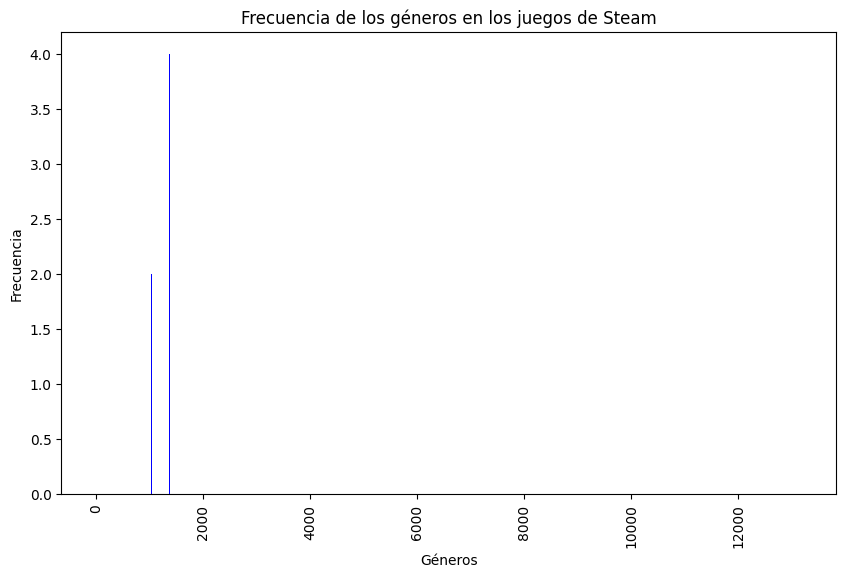

In [18]:
# Importo librerías.
import pandas as pd
import matplotlib.pyplot as plt

# Cuento la frecuencia de cada género.
genre_counts = df_steam_games[new_columns_genres].sum().value_counts()

# Creo el gráfico de barras.
plt.figure(figsize=(10,6))
plt.bar(genre_counts.index, genre_counts.values, color='b')

plt.xlabel('Géneros')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los géneros en los juegos de Steam')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor visualización

plt.show()

### Trabajaré app_name y title

In [19]:
# Importo librerías.
import pandas as pd

# Declaramos las columnas
app_name = []
title = []

# Lee los datos de las columnas
for row in input().split("\n"):
    app_name.append(row.split(",")[0])
    title.append(row.split(",")[1])

# Creamos un DataFrame
df_steam_games = pd.DataFrame({"app_name": app_name, "title": title})

# Visualizamos el contenido de las columnas
print(df_steam_games[["app_name", "title"]])

# Creamos una máscara cuando app_name es diferente a title.
diferentes = df_steam_games["app_name"] != df_steam_games["title"]

# Obtenemos los índices True de diferentes.
indices_true = diferentes.nonzero()[0]

# Visualizamos algunos resultados después de aplicar los filtros.
df_steam_games.loc[indices_true, ["app_name", "title"]].sample(10)


IndexError: list index out of range

In [ ]:
""" Verifico si 'app_name' y 'title' son iguales para todas las filas """ 
son_iguales = (df_steam_games['app_name'] == df_steam_games['title']).all()

print(f"¿Son 'app_name' y 'title' iguales para todas las filas? {son_iguales}")

¿Son 'app_name' y 'title' iguales para todas las filas? False


### Analizo 'app_name' & 'title

In [ ]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'app_name'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'app_name'
--------------------------------------------------

Primeros 20 valores:
0                                   Lost Summoner Kitty
1                                             Ironbound
2                               Real Pool 3D - Poolians
3                                               弹炸人2222
4                                 Battle Royale Trainer
5                            SNOW - All Access Pro Pass
6                         SNOW - All Access Legend Pass
7     Army of Tentacles: (Not) A Cthulhu Dating Sim:...
8                                           Beach Rules
9                           Planetarium 2 - Zen Odyssey
10                              The first thrust of God
11                                  SNOW - Starter Pack
12              The first thrust of God - All Aircrafts
13                                 SNOW - Lifetime Pack
14                             The Warrior Of Treasures
15                         RC Plane 3 - Canyon Scena

In [ ]:
# Filtro el DataFrame para mostrar solo las filas donde 'app_name' es 'Alter Ego'
df_alter_ego = df_steam_games[df_steam_games['app_name'] == 'Alter Ego']

# Imprimo el DataFrame filtrado
print(df_alter_ego)


                 publisher   app_name      title  \
7784   Choose Multiple LLC  Alter Ego  Alter Ego   
22274           Viva Media  Alter Ego  Alter Ego   

                                                     url release_date  \
7784   http://store.steampowered.com/app/664780/Alter...   1986-05-01   
22274  http://store.steampowered.com/app/63110/Alter_...   2010-08-03   

                                             reviews_url price early_access  \
7784   http://steamcommunity.com/app/664780/reviews/?...  7.99        False   
22274  http://steamcommunity.com/app/63110/reviews/?b...  9.99        False   

           id            developer  ...  Steam Achievements  Steam Cloud  \
7784   664780  Choose Multiple LLC  ...                   0            1   
22274   63110    bitComposer Games  ...                   0            0   

       Steam Leaderboards  Steam Trading Cards  Steam Turn Notifications  \
7784                    0                    0                         0   
2227

In [ ]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'title'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'title'
--------------------------------------------------

Primeros 20 valores:
0                                   Lost Summoner Kitty
1                                             Ironbound
2                               Real Pool 3D - Poolians
3                                               弹炸人2222
4                                 Battle Royale Trainer
5                            SNOW - All Access Pro Pass
6                         SNOW - All Access Legend Pass
7     Army of Tentacles: (Not) A Cthulhu Dating Sim:...
8                                           Beach Rules
9                           Planetarium 2 - Zen Odyssey
10                              The first thrust of God
11                                  SNOW - Starter Pack
12              The first thrust of God - All Aircrafts
13                                 SNOW - Lifetime Pack
14                             The Warrior Of Treasures
15                         RC Plane 3 - Canyon Scenario

### Analizo ¿cuántos juegos únicos por categoría hay?

In [ ]:
# Agrupo por género y cuento los juegos únicos
unique_games_per_genre = df_steam_games.groupby(new_columns)['id'].nunique()

# Calculo el número de combinaciones únicas de géneros
num_unique_combinations = len(unique_games_per_genre)

# Imprimo el resultado y el mensaje personalizado con el número calculado
print(f"{unique_games_per_genre}\n\nEl código agrupa los juegos por género y cuenta el número de juegos únicos para cada combinación de géneros, resultando en {num_unique_combinations} combinaciones únicas de géneros en el conjunto de datos.")

Captions available  Commentary available  Cross-Platform Multiplayer  Downloadable Content  Full controller support  Game demo  Gamepad  HTC Vive  In-App Purchases  Includes Source SDK  Includes level editor  Keyboard / Mouse  Local Co-op  Local Multi-Player  MMO  Mods  Mods (require HL1)  Mods (require HL2)  Multi-player  Oculus Rift  Online Co-op  Online Multi-Player  Partial Controller Support  Room-Scale  Seated  Shared/Split Screen  Single-player  Standing  Stats  Steam Achievements  Steam Cloud  Steam Leaderboards  Steam Trading Cards  Steam Turn Notifications  Steam Workshop  SteamVR Collectibles  Tracked Motion Controllers  Valve Anti-Cheat enabled  Windows Mixed Reality
0                   0                     0                           0                     0                        0          0        0         0                 0                    0                      0                 0            0                   0    0     0                   0                   0

### Creare un gráfico para ver el top ten de los juegos y los últimos 10 juegos menos usados para tener una comparativa.

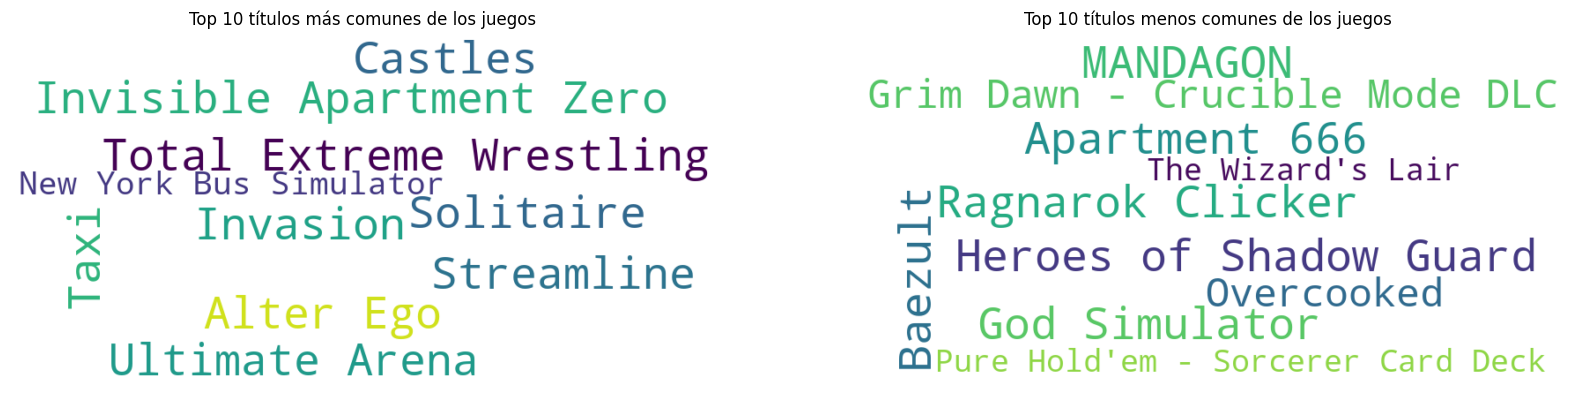

In [ ]:
# Importo librerías
from wordcloud import WordCloud

# Creo una serie con todos los títulos
all_titles = df_steam_games['title']

# Obtengo los 10 títulos más y menos comunes
top_ten_titles = all_titles.value_counts().nlargest(10).to_dict()
bottom_ten_titles = all_titles.value_counts().nsmallest(10).to_dict()

# Creo las nubes de palabras con parámetros ajustados
wordcloud_top = WordCloud(width=800, height=400, background_color='white', max_font_size=50, max_words=100).generate_from_frequencies(top_ten_titles)
wordcloud_bottom = WordCloud(width=800, height=400, background_color='white', max_font_size=50, max_words=100).generate_from_frequencies(bottom_ten_titles)

# Creo una figura con dos subtramas
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Muestro las nubes de palabras en las subtramas
axs[0].imshow(wordcloud_top, interpolation='bilinear')
axs[0].set_title('Top 10 títulos más comunes de los juegos')
axs[0].axis('off')

axs[1].imshow(wordcloud_bottom, interpolation='bilinear')
axs[1].set_title('Top 10 títulos menos comunes de los juegos')
axs[1].axis('off')

plt.show()


### Trabajaré reviews_url.

In [ ]:
# Muestra los primeros elementos de la columna 'reviews_url'
print(df_steam_games['reviews_url'].head().to_frame())

print("\nNo considero relevante a la columna 'reviews_url', pero para un futuro trabajo tiene información importante, por eso no la elimino en caso de expandir mi trabajo de MLOPS.")

                                         reviews_url
0  http://steamcommunity.com/app/761140/reviews/?...
1  http://steamcommunity.com/app/643980/reviews/?...
2  http://steamcommunity.com/app/670290/reviews/?...
3  http://steamcommunity.com/app/767400/reviews/?...
4  http://steamcommunity.com/app/772540/reviews/?...

No considero relevante a la columna 'reviews_url', pero para un futuro trabajo tiene información importante, por eso no la elimino en caso de expandir mi trabajo de MLOPS.


### Trabajaré release_date.

In [ ]:
print("Luego de haber realizado las correcciones pertinentes y su limpieza, puedo afirmar que no tenemos datos nulos; a continuación procedo a la conversión de la columna 'release_date' a datetime y la renombre año de lanzamiento y creo la columna 'año'.")

# Convierto la columna release_date a datetime
df_steam_games['release_date'] = pd.to_datetime(df_steam_games['release_date'], errors='coerce')

# Renombro la columna release_date a 'año de lanzamiento'
df_steam_games.rename(columns={'release_date': 'año de lanzamiento'}, inplace=True)

# Creo la columna 'año'
df_steam_games['año'] = df_steam_games['año de lanzamiento'].dt.year

# Analizo los datos
print(df_steam_games['año de lanzamiento'].head())

Luego de haber realizado las correcciones pertinentes y su limpieza, puedo afirmar que no tenemos datos nulos; a continuación procedo a la conversión de la columna 'release_date' a datetime y la renombre año de lanzamiento y creo la columna 'año'.
0   2018-01-04
1   2018-01-04
2   2017-07-24
3   2017-12-07
4   2018-01-04
Name: año de lanzamiento, dtype: datetime64[ns]


### Análisis de la popularidad de los juegos por año de lanzamiento.

In [ ]:
# Obtengo el año de lanzamiento mínimo y máximo
min_year = df_steam_games['año de lanzamiento'].min()
max_year = df_steam_games['año de lanzamiento'].max()

print(f"El rango de años de lanzamiento es de {min_year} a {max_year}")

El rango de años de lanzamiento es de 1983-06-19 00:00:00 a 2021-12-31 00:00:00


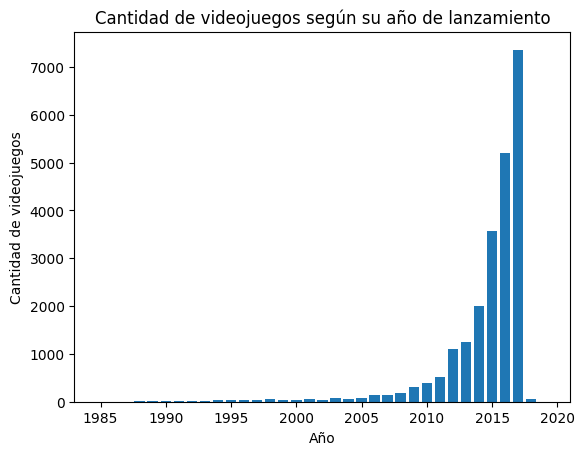

In [ ]:
# Importo librerías
import matplotlib.pyplot as plt

# Extraigo el año de la fecha de lanzamiento
df_steam_games['año'] = df_steam_games['año de lanzamiento'].dt.year

# Creo una serie con la cantidad de videojuegos según su año de lanzamiento.
games_by_year = df_steam_games.groupby("año").size()

# Hago un gráfico de barras de games_by_year.
plt.bar(games_by_year.index, games_by_year.values)

# Ajusto opciones del gráfico.
plt.xlabel("Año")
plt.ylabel("Cantidad de videojuegos")
plt.title("Cantidad de videojuegos según su año de lanzamiento")
plt.xlim(1983, 2021)
plt.show()

### Trabajaré price

In [ ]:
# Importo librerías
import pandas as pd

def replace_price(price):
    """
    Esta función reemplaza las cadenas de texto por 0.0 en la columna 'price'.
    
    Parámetros:
    price (str, float): El precio a reemplazar.
    
    Retorna:
    float: El precio reemplazado.
    """
    if isinstance(price, str):
        return 0.0
    else:
        return price

# Corrijo precios en df_steam_games
df_steam_games['price'].replace({'Starting at $499.00': 499.0, 'Starting at $449.00': 499.0}, inplace=True)

# Aplico la función a la columna price
df_steam_games['price'] = df_steam_games['price'].apply(replace_price)

# Calculo la cantidad de valores nulos en cada columna
nulos = df_steam_games.isnull().sum()

# Calculo el porcentaje de filas con valores nulos en las columnas 'developer' y 'año de lanzamiento'
porcentaje_nulos = 1 - df_steam_games.dropna(subset=["developer","año de lanzamiento"]).shape[0] / df_steam_games.shape[0]

print(df_steam_games.head())
print(df_steam_games['price'].head())
print(df_steam_games['price'].tail())
print(df_steam_games['price'].describe())
print(df_steam_games['price'].value_counts())
print(nulos)
print(f'Porcentaje de nulos : {porcentaje_nulos}')

             publisher                 app_name                    title  \
0            Kotoshiro      Lost Summoner Kitty      Lost Summoner Kitty   
1     Making Fun, Inc.                Ironbound                Ironbound   
2         Poolians.com  Real Pool 3D - Poolians  Real Pool 3D - Poolians   
3                 彼岸领域                  弹炸人2222                  弹炸人2222   
4  Trickjump Games Ltd    Battle Royale Trainer    Battle Royale Trainer   

                                                 url año de lanzamiento  \
0  http://store.steampowered.com/app/761140/Lost_...         2018-01-04   
1  http://store.steampowered.com/app/643980/Ironb...         2018-01-04   
2  http://store.steampowered.com/app/670290/Real_...         2017-07-24   
3     http://store.steampowered.com/app/767400/2222/         2017-12-07   
4  http://store.steampowered.com/app/772540/Battl...         2018-01-04   

                                         reviews_url  price early_access  \
0  http://steamc

### Análisis de la columna.

In [ ]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'price'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)



Analizando la columna 'price'
--------------------------------------------------

Primeros 20 valores:
0      4.99
1      0.00
2      0.00
3      0.99
4      3.99
5     18.99
6     29.99
7     10.99
8      3.99
9      2.99
10     1.59
11    14.99
12     1.99
13    59.99
14     0.99
15     2.99
16     2.99
17     4.99
18     9.99
19     9.99
Name: price, dtype: float64

Número de valores nulos: 0

Tipo de datos: float64

Estadísticas descriptivas:
count    22915.000000
mean         9.360052
std         16.981631
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64


### Trabajaré early_acces

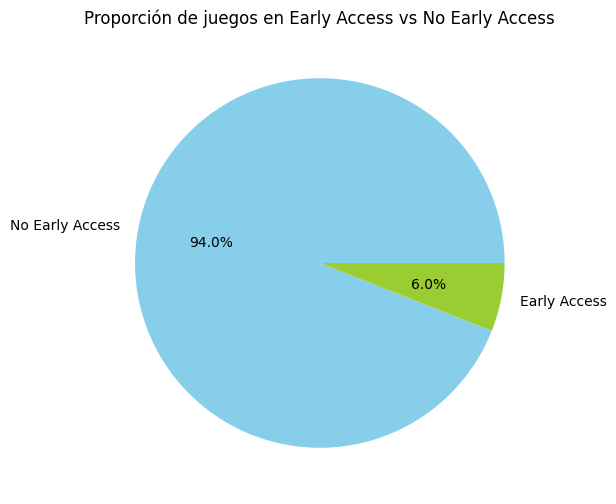

In [ ]:
# Importo librerías.
import matplotlib.pyplot as plt

# Cuento la cantidad de juegos en 'Early Access' y no en 'Early Access'
early_access_counts = df_steam_games['early_access'].value_counts()

# Creo un gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(early_access_counts, labels=['No Early Access', 'Early Access'], autopct='%1.1f%%',
        colors=['skyblue', 'yellowgreen'])
plt.title('Proporción de juegos en Early Access vs No Early Access')
plt.show()


### Análisis de la columna.

In [ ]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'early_access'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'early_access'
--------------------------------------------------

Primeros 20 valores:
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: early_access, dtype: object

Número de valores nulos: 0

Tipo de datos: object

Valores únicos (top 5):
early_access
False    21544
True      1371
Name: count, dtype: int64


### Trabajaré id

In [ ]:
# Analizo el número de nulos en la columna 'id'
print("El número de nulos en la columna 'id' es:", df_steam_games.id.isna().sum())

# Elimino las filas con valores NaN
df_steam_games.dropna(inplace=True)

# Imprimo el número de duplicados en la columna 'id'
print("El número de duplicados en la columna 'id' es:", df_steam_games.id.duplicated().sum())

# Elimino los duplicados en la columna 'id'
df_steam_games.drop_duplicates(subset=["id"], inplace=True)

# Reseteo el índice del DataFrame
df_steam_games.reset_index(drop=True, inplace=True)

# Imprimo el número de registros y el número de 'id' únicos
print(f"El número de registros es {df_steam_games.shape[0]}.")
print(f"El número de 'id' únicos es {df_steam_games.id.nunique()}.")

# Convierto 'id' a número para ahorrar espacio de almacenamiento
df_steam_games["id"] = df_steam_games["id"].astype("int32")

# Cambio el nombre de la columna 'id' a 'user_id'
df_steam_games.rename(columns={'id': 'user_id'}, inplace=True)

# Verifico los cambios
print(df_steam_games.head())


El número de nulos en la columna 'id' es: 0
El número de duplicados en la columna 'id' es: 0
El número de registros es 22881.
El número de 'id' únicos es 22881.
             publisher                 app_name                    title  \
0            Kotoshiro      Lost Summoner Kitty      Lost Summoner Kitty   
1     Making Fun, Inc.                Ironbound                Ironbound   
2         Poolians.com  Real Pool 3D - Poolians  Real Pool 3D - Poolians   
3                 彼岸领域                  弹炸人2222                  弹炸人2222   
4  Trickjump Games Ltd    Battle Royale Trainer    Battle Royale Trainer   

                                                 url año de lanzamiento  \
0  http://store.steampowered.com/app/761140/Lost_...         2018-01-04   
1  http://store.steampowered.com/app/643980/Ironb...         2018-01-04   
2  http://store.steampowered.com/app/670290/Real_...         2017-07-24   
3     http://store.steampowered.com/app/767400/2222/         2017-12-07   
4  http

### Análisis de la columna.

In [ ]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'user_id'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'user_id'
--------------------------------------------------

Primeros 20 valores:
0     761140
1     643980
2     670290
3     767400
4     772540
5     774277
6     774278
7     770380
8     768880
9     765320
10    773650
11    774271
12    773690
13    774279
14    768060
15    775880
16    775881
17    653960
18    282010
19        70
Name: user_id, dtype: int32

Número de valores nulos: 0

Tipo de datos: int32

Estadísticas descriptivas:
count    2.288100e+04
mean     4.308574e+05
std      1.915666e+05
min      1.000000e+01
25%      3.024700e+05
50%      4.270010e+05
75%      5.809700e+05
max      2.028850e+06
Name: user_id, dtype: float64


### Trabajaré developer

Top 10 desarrolladores con más juegos:
 developer
Dovetail Games                                                           253
KOEI TECMO GAMES CO., LTD.                                               179
Ubisoft - San Francisco                                                  178
Capcom                                                                   107
Paradox Development Studio                                                97
Stainless Games                                                           83
DL Softworks                                                              78
Relic Entertainment,Feral Interactive (Mac),Feral Interactive (Linux)     77
Choice of Games                                                           76
SCS Software                                                              73
Name: count, dtype: int64


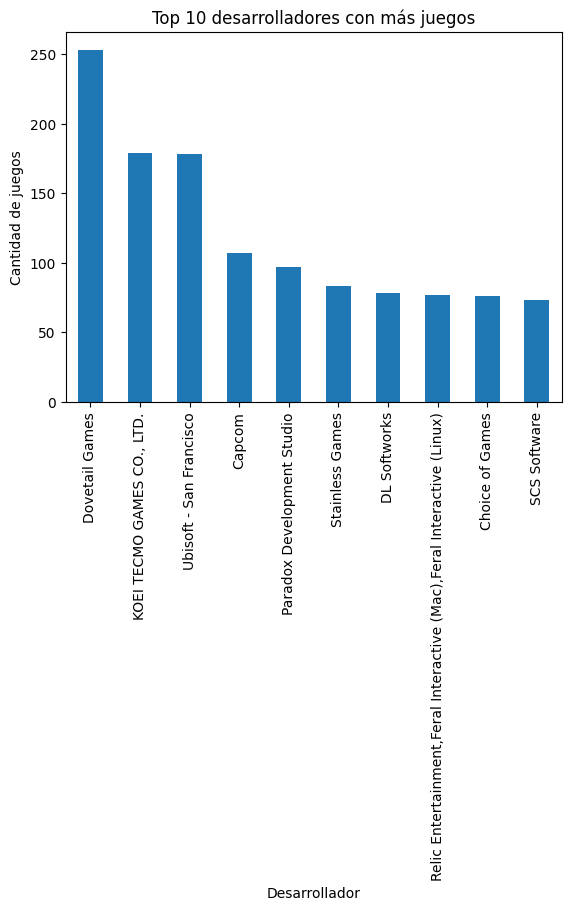

In [ ]:
# Importo librerías.
import pandas as pd
import matplotlib.pyplot as plt

# Cuento la cantidad de juegos por desarrollador
developer_counts = df_steam_games['developer'].value_counts()

# Imprimo los primeros 10 desarrolladores con más juegos
print("Top 10 desarrolladores con más juegos:\n", developer_counts.head(10))

# Creo un gráfico de barras con los primeros 10 desarrolladores con más juegos
developer_counts.head(10).plot(kind='bar')
plt.title('Top 10 desarrolladores con más juegos')
plt.xlabel('Desarrollador')
plt.ylabel('Cantidad de juegos')
plt.show()

### Análisis de la columna.

In [ ]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'developer'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'developer'
--------------------------------------------------

Primeros 20 valores:
0                          Kotoshiro
1                   Secret Level SRL
2                       Poolians.com
3                               彼岸领域
4                Trickjump Games Ltd
5             Poppermost Productions
6             Poppermost Productions
7     Stegalosaurus Game Development
8                  Copperpick Studio
9                       Ghulam Jewel
10                            Apillo
11            Poppermost Productions
12                            Apillo
13            Poppermost Productions
14                       Tero Lunkka
15                      FrozenPepper
16                      FrozenPepper
17                     Casey Labrack
18               Stainless Games Ltd
19                             Valve
Name: developer, dtype: object

Número de valores nulos: 0

Tipo de datos: object

Valores únicos (top 5):
developer
Dovetail Games                253


<h3 style="color:green">
Ahora bien analizamos los títulos de los juegos de Steam mediante el uso de técnicas de procesamiento del lenguaje natural en dónde encontraremos tendencias.

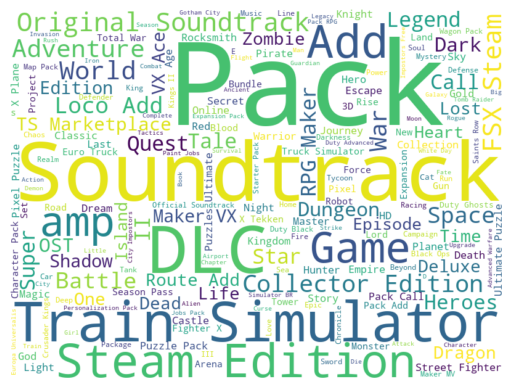

In [ ]:
# Importo librerías
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
from wordcloud import WordCloud
from collections import Counter

def analyze_steam_game_titles(df_steam_games):
  """
  Analizo los títulos de los juegos de Steam.

  Args:
    df_steam_games: Un DataFrame de pandas con los juegos de Steam.

  Returns:
    Una lista con los títulos completos.
  """

  # Accedo a la columna de los títulos del DataFrame
  titles = df_steam_games["title"].tolist()

  return titles  # Devuelve una lista con los títulos completos

# Analizo los títulos de los juegos
titles = analyze_steam_game_titles(df_steam_games)

# Creo una nube de palabras con los títulos completos
wordcloud = WordCloud(width=800, height=600, background_color="white").generate(' '.join(titles))

# Muestro la nube de palabras
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Analizaremos el top ten de los juegos y los últimos 10 menos jugados.

In [ ]:
print(df_steam_games.columns)

Index(['publisher', 'app_name', 'title', 'url', 'año de lanzamiento',
       'reviews_url', 'price', 'early_access', 'user_id', 'developer',
       ...
       'Steam Cloud', 'Steam Leaderboards', 'Steam Trading Cards',
       'Steam Turn Notifications', 'Steam Workshop', 'SteamVR Collectibles',
       'Tracked Motion Controllers', 'Valve Anti-Cheat enabled',
       'Windows Mixed Reality', 'año'],
      dtype='object', length=412)


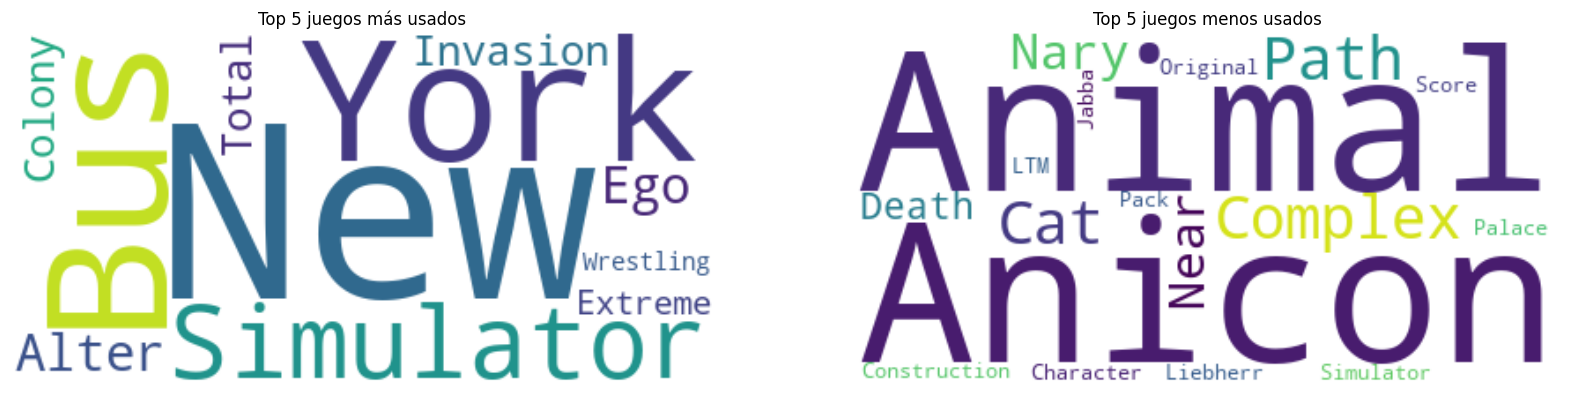

In [ ]:
# Importo librerías
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordclouds(df_steam_games):
    """
    Esta función crea dos nubes de palabras: una para los juegos más usados y otra para los menos usados.
    
    Parámetros:
    df_steam_games (pandas.DataFrame): El DataFrame que contiene los datos de los juegos.
    
    Retorna:
    None
    """
    # Usaré 'app_name' como columna de uso
    top_five_games = df_steam_games['app_name'].value_counts().nlargest(5).index
    bottom_five_games = df_steam_games['app_name'].value_counts().nsmallest(5).index

    # Creo la nube de palabras para los juegos más usados
    wordcloud_top = WordCloud(background_color='white').generate(' '.join(top_five_games))

    # Creo la nube de palabras para los juegos menos usados
    wordcloud_bottom = WordCloud(background_color='white').generate(' '.join(bottom_five_games))

    # Creo una figura con dos subplots
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))

    # Muestro la nube de palabras de los juegos más usados
    axs[0].imshow(wordcloud_top, interpolation='bilinear')
    axs[0].set_title('Top 5 juegos más usados')
    axs[0].axis('off')

    # Muestro la nube de palabras de los juegos menos usados
    axs[1].imshow(wordcloud_bottom, interpolation='bilinear')
    axs[1].set_title('Top 5 juegos menos usados')
    axs[1].axis('off')

    # Muestro la figura
    plt.show()

# Uso la función para crear las nubes de palabras
create_wordclouds(df_steam_games)


In [ ]:
# Para el DataFrame df_steam_games
print(pd.Series(df_steam_games.columns).to_string(index=False))

# Para el DataFrame df_user_reviews_desanidado
print(pd.Series(df_user_reviews_desanidado.columns).to_string(index=False))

# Para el DataFrame df_users_items_desanidado
print(pd.Series(df_users_items_desanidado.columns).to_string(index=False))


<h3 style="color:blue">
Ahora trabajaré con User Reviews

In [1]:
# Ya realizada la carga anteiormente, vemos su contenido
df_user_reviews

NameError: name 'df_user_reviews' is not defined

In [3]:
# Importo librerías.
import pandas as pd

def main():

    # Importamos los datos.
    df_user_reviews = pd.read_csv("data/user_reviews.csv")

    # Inspecciono los tipos de datos de cada columna en tu DataFrame
    dtypes = df_user_reviews.dtypes

    # Si alguna columna es de tipo 'object', podría contener datos anidados
    object_cols = df_user_reviews.select_dtypes(include=['object']).columns

    # Imprimo los tipos de datos, las columnas que podrían contener datos anidados y la forma del DataFrame
    print(f"Tipos de datos en el DataFrame:\n{dtypes}\n")
    print(f"Columnas que podrían contener datos anidados: {object_cols}\n")
    print(f"El df_user_reviews tiene {df_user_reviews.shape[0]} filas y {df_user_reviews.shape[1]} columnas.")

if __name__ == "__main__":
    main()


Tipos de datos en el DataFrame:
user_id                object
user_url               object
posted                 object
item_id               float64
recommend              object
coincide                 bool
user_id_length          int64
user_url_length         int64
user_url_domain        object
sentiment_analysis      int64
dtype: object

Columnas que podrían contener datos anidados: Index(['user_id', 'user_url', 'posted', 'recommend', 'user_url_domain'], dtype='object')

El df_user_reviews tiene 35599 filas y 10 columnas.


### Procederé a visualizar las columnas que contienen una lista o un diccionario.

In [4]:
# Importo librerías.
import pandas as pd

# Itero sobre cada columna
for column in df_user_reviews.columns:
    # Obtengo el primer valor no nulo
    non_null_values = df_user_reviews[column].dropna()
    if non_null_values.empty:
        print(f"La columna '{column}' solo contiene valores nulos.")
        continue
    first_non_null_value = non_null_values.iloc[0]

    # Compruebo si es una lista o un diccionario
    if isinstance(first_non_null_value, list):
        print(f"La columna '{column}' contiene una lista.")
    elif isinstance(first_non_null_value, dict):
        print(f"La columna '{column}' contiene un diccionario.")
    else:
        print(f"La columna '{column}' no contiene ni listas ni diccionarios.")

La columna 'user_id' no contiene ni listas ni diccionarios.
La columna 'user_url' no contiene ni listas ni diccionarios.
La columna 'reviews' contiene una lista.


### Desanido, creando columnas ficticias con dumies; verifico los tipos de datos, duplicados y chequeo.

In [5]:
# Importo las librerías necesarias.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def desanidar_reviews(df, column):
    """
    Esta función desanida la columna 'reviews' y crea variables ficticias.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a desanidar y crear variables ficticias.
    
    Retorna:
    df (pandas.DataFrame): El DataFrame con las nuevas columnas.
    new_columns (list): La lista de las nuevas columnas.
    """
    # Guardo las columnas originales
    original_columns = df.columns.tolist()

    # Desanido la columna 'reviews'
    df = df.explode(column)

    # Duplico las filas generando un diccionario por cada diccionario en la lista. Luego, concateno el DataFrame original con el DataFrame generado a partir de transformar los diccionarios a pandas
    df = pd.concat([df.drop([column],axis=1),df[column].apply(pd.Series)],axis=1)

    # Encuentro las nuevas columnas después del desanidado
    new_columns = [col for col in df.columns if col not in original_columns]

    return df, new_columns

# Uso de la función para la columna 'reviews'
df_user_reviews = df_user_reviews  # aquí coloco el nombre del df y su nombre
column = 'reviews'  # aquí coloco el nombre de la columna

df_user_reviews, new_columns_reviews = desanidar_reviews(df_user_reviews, column)

print(f"El df_user_reviews tiene {df_user_reviews.shape[0]} filas y {df_user_reviews.shape[1]} columnas.")
print(f"Nuevas columnas para 'reviews': {new_columns_reviews}")


El df_user_reviews tiene 59333 filas y 10 columnas.
Nuevas columnas para 'reviews': ['funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review', 0]


In [6]:
# Importo librerías.
import pandas as pd

# 'df_user_reviews_desanidado' es tu DataFrame y 'user_id' es el nombre de la columna en la que quieres buscar duplicados.
duplicados = df_user_reviews.duplicated(subset='user_id', keep=False)

# 'duplicados' es una Serie de booleanos que es True para cada fila duplicada.
# Puedes usarla para obtener solo las filas duplicadas:
filas_duplicadas = df_user_reviews[duplicados]

# Ahora 'filas_duplicadas' contiene solo las filas de 'df_user_reviews_desanidado' donde 'user_id' tiene un valor duplicado.
filas_duplicadas


,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,0
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,NaN
1,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,NaN
1,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,NaN
...,...,...,...,...,...,...,...,...,...,...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...,NaN
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...,NaN
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,NaN
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D,NaN


In [7]:
# Importo librerías.
import pandas as pd

# Agrupo el DataFrame por 'user_id' y 'review', y cuenta el número de ocurrencias de cada combinación.
conteo_resenas = filas_duplicadas.groupby(['user_id', 'review']).size()

# Filtro las combinaciones que ocurren más de una vez.
resenas_duplicadas = conteo_resenas[conteo_resenas > 1]

print(resenas_duplicadas)


user_id                review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
05041129               This game to me it is so good that it is better than any of the games out their and $15 worth it                                                                                              

<h5 style="color:skyblue">
Podemos afirmar es que todas las columnas para encontrar reseñas duplicadas. Vemos que no hay reseñas duplicadas cuando se consideran todas las columnas (‘user_id’, ‘user_url’, ‘funny’, ‘posted’, ‘last_edited’, ‘item_id’, ‘helpful’, ‘recommend’, ‘review’, 0), es decir son reseñas únicas. Yo la escribí a mano, la podemos agregar automáticamente con print?

In [8]:
# Procedo a identificar reseñas duplicadas.
duplicados = filas_duplicadas.duplicated(subset=['user_id', 'user_url', 'funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review', 0], keep=False)

# Muestra solo las filas duplicadas.
filas_duplicadas[duplicados]

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,0
9,76561198156664158,http://steamcommunity.com/profiles/76561198156...,,Posted June 16.,,252950,0 of 1 people (0%) found this review helpful,True,love it,NaN
50,Rivtex,http://steamcommunity.com/id/Rivtex,,"Posted December 23, 2015.",,298630,0 of 1 people (0%) found this review helpful,True,Its so bosss,NaN
119,DieMadchenschanderin,http://steamcommunity.com/id/DieMadchenschanderin,,"Posted August 29, 2015.",,346110,0 of 1 people (0%) found this review helpful,True,"It's a good game, mechanics seem solid and the...",NaN
119,DieMadchenschanderin,http://steamcommunity.com/id/DieMadchenschanderin,,"Posted October 5, 2015.","Last edited October 5, 2015.",380770,0 of 5 people (0%) found this review helpful,False,"Well, I don't have much to say about the game....",NaN
119,DieMadchenschanderin,http://steamcommunity.com/id/DieMadchenschanderin,,Posted June 29.,,454890,No ratings yet,True,"It's a pretty good game, not bad for the 49 ce...",NaN
...,...,...,...,...,...,...,...,...,...,...
18234,76561198092022514,http://steamcommunity.com/profiles/76561198092...,,Posted July 3.,,422400,No ratings yet,True,Muy entretenido y una coleccion de armas prome...,NaN
18234,76561198092022514,http://steamcommunity.com/profiles/76561198092...,,Posted June 1.,,218620,No ratings yet,True,"Tiene una jugabilidad y tematica muy buena :D,...",NaN
18234,76561198092022514,http://steamcommunity.com/profiles/76561198092...,,"Posted August 17, 2014.",,261820,No ratings yet,True,"Buen juego, no importa el desarrrollo que tien...",NaN
18234,76561198092022514,http://steamcommunity.com/profiles/76561198092...,,"Posted February 17, 2014.",,224260,No ratings yet,True,exelente aporte :D¡¡¡ es una buen mod basado e...,NaN


<h5 style="color:skyblue">
Podemos afirmar es que todas las columnas para encontrar reseñas duplicadas. Vemos que no hay reseñas duplicadas cuando se consideran todas las columnas (‘user_id’, ‘user_url’, ‘funny’, ‘posted’, ‘last_edited’, ‘item_id’, ‘helpful’, ‘recommend’, ‘review’, 0), es decir son reseñas únicas.

### Normalizaré a str, posteriormente algunos emojis, signos, entre otros.

In [15]:
# Identifico las filas en la columna 'review' que no son cadenas (strings)
no_strings = filas_duplicadas['review'].apply(lambda x: not isinstance(x, str))

# Verifico si todas las filas en la columna 'review' son cadenas (strings)
all_strings = not no_strings.any()

print(all_strings)

# Muestro solo las filas que no son cadenas (strings)
print(filas_duplicadas[no_strings])


False
              user_id                                           user_url  \
83  76561198094224872  http://steamcommunity.com/profiles/76561198094...   

   funny posted last_edited item_id helpful recommend review   0  
83   NaN    NaN         NaN     NaN     NaN       NaN    NaN NaN  


In [20]:
# Identifico las filas en la columna 'nreview' que no son cadenas (strings)
no_strings = filas_duplicadas['review'].apply(lambda x: not isinstance(x, str))

# Muestro solo las filas que no son cadenas (strings)
filas_duplicadas[no_strings]


,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,0


In [19]:
# Reemplazo los valores NaN en la columna 'review' con 'Sin Dato'
filas_duplicadas.loc[:, 'review'] = filas_duplicadas['review'].fillna('Sin Dato')


In [23]:
# Importo librerías.
import numpy as np

# Asegúrate de que 'new_columns_reviews' sea una lista de columnas
new_columns_reviews = list(new_columns_reviews)

# Agrega las nuevas columnas a tu DataFrame (inicializadas con valores NaN o un valor predeterminado)
for column in new_columns_reviews:
    if column not in df_user_reviews.columns:
        df_user_reviews[column] = np.nan  # Puedes reemplazar np.nan con el valor que quieras

# Ahora, cuando imprimas las columnas, también verás las nuevas columnas
print(df_user_reviews.columns)


Index([    'user_id',    'user_url',       'funny',      'posted',
       'last_edited',     'item_id',     'helpful',   'recommend',
            'review',             0,           'S',           'i',
                 'm',           'p',           'l',           'e',
                 ' ',           'y',           't',           'w',
                 'h',           'g',           'r',           'a',
                 'b',           '.',           'I',           'n',
                 'o',           'd',           's',           '"',
                 'z',           'k',           'f',           '4',
                 'u',           'v',           'A',           'F',
                 'P'],
      dtype='object')


In [24]:
df_user_reviews

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,0,...,"""",z,k,f,4,u,v,A,F,P
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Analizo los valores NaN.
columnas_de_interes = df_user_reviews.columns.tolist()  # Todas las columnas
porcentaje_nan = df_user_reviews[columnas_de_interes].isnull().mean() * 100
columnas_a_eliminar = porcentaje_nan[porcentaje_nan == 100].index.tolist()

# Añado las columnas específicas que quiero eliminar por no ser relevante.
columnas_a_eliminar.extend(['funny', 'last_edited', 'helpful', '0'])

# Verifico si las columnas existen en el DataFrame y las eliminamos
for columna in columnas_a_eliminar:
    if columna in df_user_reviews.columns:
        df_user_reviews = df_user_reviews.drop(columna, axis=1)

print("Las columnas con el 100% de datos NaN y las columnas 'funny', 'last_edited', 'helpful' y '0' han sido eliminadas del DataFrame.")


Las columnas con el 100% de datos NaN y las columnas 'funny', 'last_edited', 'helpful' y '0' han sido eliminadas del DataFrame.


In [26]:
df_user_reviews

,user_id,user_url,posted,item_id,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted July 15, 2011.",22200,True,It's unique and worth a playthrough.
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...
1,js41637,http://steamcommunity.com/id/js41637,"Posted June 24, 2014.",251610,True,I know what you think when you see this title ...
1,js41637,http://steamcommunity.com/id/js41637,"Posted September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,Posted July 10.,70,True,a must have classic from steam definitely wort...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,Posted July 8.,362890,True,this game is a perfect remake of the original ...
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,Posted July 3.,273110,True,had so much fun plaing this and collecting res...
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,Posted July 20.,730,True,:D


In [28]:
# Creo un diccionario de caracteres y sus significados para normalizar en la columna 'review'.
char_dict = {
    ":D": "I liked it",
    ":(": "I didn't like it",
    ":|": "I'm indifferent",
    "&": " and ",
    "%": " percent",
    "♥♥♥♥♥♥♥": "I loved it",
    "♥♥♥♥♥♥♥♥": "I loved it a lot",
}

# Creo una función para reemplazar los caracteres por sus significados.
def replace_chars(text):
    """
    Esta función toma una cadena de texto y reemplaza ciertos caracteres (definidos en el diccionario char_dict)
    por sus significados correspondientes. Utiliza un codificador para manejar los caracteres especiales.

    Parámetros:
    text (str): La cadena de texto a procesar.

    Retorna:
    str: La cadena de texto con los caracteres reemplazados.
    """
    for char, meaning in char_dict.items():
        text = text.replace(char, meaning)
    return text

# Convierto toda la columna 'review' a texto
df_user_reviews['review'] = df_user_reviews['review'].astype(str)

# Aplico la función a las reseñas.
df_user_reviews['review'] = df_user_reviews['review'].apply(replace_chars)
df_user_reviews

,user_id,user_url,posted,item_id,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted July 15, 2011.",22200,True,It's unique and worth a playthrough.
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...
1,js41637,http://steamcommunity.com/id/js41637,"Posted June 24, 2014.",251610,True,I know what you think when you see this title ...
1,js41637,http://steamcommunity.com/id/js41637,"Posted September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,Posted July 10.,70,True,a must have classic from steam definitely wort...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,Posted July 8.,362890,True,this game is a perfect remake of the original ...
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,Posted July 3.,273110,True,had so much fun plaing this and collecting res...
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,Posted July 20.,730,True,I liked it


### Trabajaré con Posted

In [29]:
print(type(df_user_reviews['posted']))


<class 'pandas.core.series.Series'>


In [31]:
# Creo una serie booleana para cada formato
has_year = df_user_reviews['posted'].str.contains('\d{4}')  # Busco cuatro dígitos consecutivos (un año)

# Cuento cuántas filas coinciden con cada formato
num_with_year = has_year.sum()
num_without_year = len(df_user_reviews) - num_with_year

print(f"Number of rows with year: {num_with_year}")
print(f"Number of rows without year: {num_without_year}")

Number of rows with year: 49186
Number of rows without year: 10147


Considerando la información analizada, descartaré dicha columna por no proveer información sustancial a mi trabajo.

### Analizaré las columnas 'user_id' y 'user_url'

In [32]:
df_user_reviews['coincide'] = df_user_reviews['user_id'] == df_user_reviews['user_url']
print('Coincidencias:', df_user_reviews['coincide'].sum())


Coincidencias: 0


In [33]:

# Visualización de los primeros registros
print(df_user_reviews[['user_id', 'user_url']].head())

# Comparación de valores únicos
print('Valores únicos en user_id:', df_user_reviews['user_id'].nunique())
print('Valores únicos en user_url:', df_user_reviews['user_url'].nunique())

# Análisis de coincidencias
df_user_reviews['coincide'] = df_user_reviews['user_id'] == df_user_reviews['user_url']
print('Coincidencias:', df_user_reviews['coincide'].sum())

# Verificar el tipo de datos
print(df_user_reviews[['user_id', 'user_url']].dtypes)


             user_id                                           user_url
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...
1            js41637               http://steamcommunity.com/id/js41637
1            js41637               http://steamcommunity.com/id/js41637
Valores únicos en user_id: 25485
Valores únicos en user_url: 25485
Coincidencias: 0
user_id     object
user_url    object
dtype: object


In [34]:
""" Análisis de usuarios en reseñas de productos """

# Creo nuevas columnas
df_user_reviews['user_id_length'] = df_user_reviews['user_id'].str.len()
df_user_reviews['user_url_length'] = df_user_reviews['user_url'].str.len()
df_user_reviews['user_url_domain'] = df_user_reviews['user_url'].str.extract('https?://([^/]*)/.*')

# Verifico los valores nulos
print(df_user_reviews[['user_id', 'user_url']].isna().sum())

# Cuento los valores
user_id_counts = df_user_reviews['user_id'].value_counts()
user_url_counts = df_user_reviews['user_url'].value_counts()
print(user_id_counts)
print(user_url_counts)

# Identifico los usuarios frecuentes y poco frecuentes
usuarios_frecuentes = user_id_counts.head(5).index.tolist()
usuarios_poco_frecuentes = user_id_counts.tail(10).index.tolist()

# Filtro el df para incluir solo a los usuarios frecuentes y poco frecuentes
df_usuarios_frecuentes = df_user_reviews[df_user_reviews['user_id'].isin(usuarios_frecuentes)]
df_usuarios_poco_frecuentes = df_user_reviews[df_user_reviews['user_id'].isin(usuarios_poco_frecuentes)]

# Hago un análisis descriptivo y conteo de valores únicos
print(df_usuarios_frecuentes.describe())
print(df_usuarios_poco_frecuentes.describe())
print(df_usuarios_frecuentes.nunique())
print(df_usuarios_poco_frecuentes.nunique())
print(df_usuarios_frecuentes['user_id'].value_counts())
print(df_usuarios_poco_frecuentes['user_id'].value_counts())


user_id     0
user_url    0
dtype: int64
user_id
76561198094665607    20
chicken_tonight      20
OfficialSenix        20
Letachal             20
76561198064484479    20
                     ..
76561198019652792     1
76561198026959699     1
76561198071991173     1
76561198079507473     1
76561198071781219     1
Name: count, Length: 25485, dtype: int64
user_url
http://steamcommunity.com/profiles/76561198094665607    20
http://steamcommunity.com/id/chicken_tonight            20
http://steamcommunity.com/id/OfficialSenix              20
http://steamcommunity.com/id/Letachal                   20
http://steamcommunity.com/profiles/76561198064484479    20
                                                        ..
http://steamcommunity.com/profiles/76561198019652792     1
http://steamcommunity.com/profiles/76561198026959699     1
http://steamcommunity.com/profiles/76561198071991173     1
http://steamcommunity.com/profiles/76561198079507473     1
http://steamcommunity.com/profiles/765611980717

### Bueno, lo que hice es analizar las reseñas de los usuarios en un DataFrame, creando nuevas columnas para la longitud y el dominio de la URL del usuario. Identificando y filtrando los usuarios más y menos frecuentes, y realizando un análisis descriptivo y un conteo de valores únicos para estos grupos.

### Procederé a calcular la experiencia de usuario y el porcentaje de las reseñas.

In [35]:
# Importo las librerías necesarias y descargo el léxico de VADER
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
nltk.download('vader_lexicon', quiet=True)

# Creo el analizador de sentimientos
sia = SentimentIntensityAnalyzer()

# Defino la función para clasificar los sentimientos
def classify_sentiment(text):
    """Clasifica el sentimiento de un texto dado utilizando la puntuación de polaridad.

    Args:
        text (str): El texto a clasificar.

    Returns:
        int: Retorna 2 si el texto es positivo, 0 si es negativo, y 1 si es neutral o 'Sin Dato'.
    """
    if text == 'Sin Dato':
        return 1  # Neutral
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 2  # Positivo
    elif sentiment_score['compound'] <= -0.05:
        return 0  # Negativo
    else:
        return 1  # Neutral

# Aplico la función a la columna de reseñas y elimino la columna 'review'
tqdm.pandas()
df_user_reviews['sentiment_analysis'] = df_user_reviews['review'].progress_apply(classify_sentiment)
df_user_reviews.drop(columns=['review'], inplace=True)

# Muestra las primeras 5 filas de cada columna
print(df_user_reviews.head())

100%|██████████| 59333/59333 [00:42<00:00, 1404.56it/s]

             user_id                                           user_url  \
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...   
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...   
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...   
1            js41637               http://steamcommunity.com/id/js41637   
1            js41637               http://steamcommunity.com/id/js41637   

                      posted item_id recommend  coincide  user_id_length  \
0   Posted November 5, 2011.    1250      True     False              17   
0      Posted July 15, 2011.   22200      True     False              17   
0     Posted April 21, 2011.   43110      True     False              17   
1      Posted June 24, 2014.  251610      True     False               7   
1  Posted September 8, 2013.  227300      True     False               7   

   user_url_length     user_url_domain  sentiment_analysis  
0               52  steamcommun

In [ ]:
# Calculo el número total de reseñas
total_reviews = df_user_reviews_desanidado.shape[0]
# Calculo el número de reseñas en cada categoría de sentimiento
positive_reviews = df_user_reviews_desanidado[df_user_reviews_desanidado['sentiment_analysis'] == 2].shape[0]
neutral_reviews = df_user_reviews_desanidado[df_user_reviews_desanidado['sentiment_analysis'] == 1].shape[0]
negative_reviews = df_user_reviews_desanidado[df_user_reviews_desanidado['sentiment_analysis'] == 0].shape[0]
# Calculo los porcentajes
positive_percentage = (positive_reviews / total_reviews) * 100
neutral_percentage = (neutral_reviews / total_reviews) * 100
negative_percentage = (negative_reviews / total_reviews) * 100

print(f"Porcentaje de reseñas positivas: {positive_percentage}%")
print(f"Porcentaje de reseñas neutrales: {neutral_percentage}%")
print(f"Porcentaje de reseñas negativas: {negative_percentage}%")

<h5 style="color:orange">
Conclusión: la mayoría de las reseñas de los juegos son positivas en un 63.39%, mientras que un 20.51% son neutrales y un 16.10% son negativas. Podríamos trabajar en la mejora de experiencia de usuario para mejorar los valores neutrales y cambiar radicalmente el porcentaje de las experiencias negativas, realizando un análisis más profundo en cada caso en particular. Esto proporciona una visión general de las opiniones de los usuarios sobre los juegos y lo que tendríamos que trabajar para mejorar.

In [ ]:
# Analizo los outliers ya que veo que tenemos outliers
Q1 = df_user_reviews_desanidado['sentiment_analysis'].quantile(0.25)
Q3 = df_user_reviews_desanidado['sentiment_analysis'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_user_reviews_desanidado[(df_user_reviews_desanidado['sentiment_analysis'] < Q1 - 1.5 * IQR) | (df_user_reviews_desanidado['sentiment_analysis'] > Q3 + 1.5 * IQR)]

### Realizo una visualización de los datos para una mejor comprensión final. Aquí he utilizado un diagrama de caja y un diagrama de violín.

In [ ]:
# Importo librerías necesarias.
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de la figura
plt.figure(figsize=(12, 6))

# Diagrama de Caja
plt.subplot(1, 2, 1) # Esto crea una subtrama en la primera posición
sns.boxplot(x=df_user_reviews_desanidado['sentiment_analysis'])
plt.xlabel('Análisis de Sentimientos')
plt.title('Diagrama de Caja de Análisis de Sentimiento')

# Diagrama de Violín
plt.subplot(1, 2, 2) # Esto crea una subtrama en la segunda posición
sns.violinplot(x=df_user_reviews_desanidado['sentiment_analysis'])
plt.xlabel('Análisis de Sentimientos')
plt.title('Diagrama de Violín de Análisis de Sentimiento')

# Asegurarse de que los gráficos no se superpongan
plt.tight_layout()
plt.show()


<h5 style="color:gray">
El diagrama de caja muestra que la mayoría de los datos de análisis de sentimientos se concentran alrededor del valor 1.75, indicando un sesgo en esa dirección. El diagrama de violín revela una distribución bimodal, con dos grupos prominentes de datos alrededor de los valores 0.5 y 1.75, lo que sugiere dos rangos comunes de análisis de sentimientos. 

<h3 style="color:blue">
Ahora trabajaré el Users Items

In [ ]:
# Ya realizada la carga anteiormente, vemos su contenido
df_users_items

#### Observo que en la columna 'items' contiene un diccionario, lo voy a desanidar para agregar a mi actual df las nuevas columnas fruto del desanidado y consecuentemente procederé a realizar una normalización de los datos para trabajar en ellos.

In [ ]:
# Importo la librerías necesarias.
import pandas as pd
from pandas import json_normalize

# Desanido la columna 'items'
df_u_i_desanidado = pd.json_normalize(df_users_items['items'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else {'item_id': 'Sin Dato', 'item_name': 'Sin Dato'}))
# Reemplazo los valores vacíos con 'Sin Dato'
df_u_i_desanidado = df_u_i_desanidado.replace('', 'Sin Dato')
# Elimino la columna 'items' del DataFrame original
df_users_items = df_users_items.drop(columns=['items'])
# Concateno el DataFrame original con el DataFrame desanidado
df_users_items_desanidado = pd.concat([df_users_items, df_u_i_desanidado], axis=1)
# Imprimo las primeras 5 filas del DataFrame
print(df_users_items_desanidado.head())

Analizo los tipos de datos contenidos en mi df.

In [ ]:
print(df_users_items_desanidado.dtypes, "\n\n", df_users_items_desanidado, "\n\n", df_users_items_desanidado.columns)


#### Veremos un análisis de importancia de características para ver relaciones.

In [ ]:
# Importo librerías necesarias.
import matplotlib.pyplot as plt

plt.scatter(df_users_items_desanidado['items_count'], df_users_items_desanidado['playtime_forever'])
plt.xlabel('items_count')
plt.ylabel('playtime_forever')
plt.show()

##### Procederé a realizar un análisis exploratorio de datos de videojuegos: Investigamos las relaciones entre el conteo de ítems y el tiempo de juego, y realizamos un análisis temporal y de valores atípicos para obtener una comprensión más profunda de nuestros datos para poder interpretar mi gráfico anterior que revela que, aunque la mayoría de los datos tienen bajos conteos de ítems y tiempos de juego, existen excepciones con tiempos de juego constantes o conteos de ítems crecientes sin incremento en el tiempo de juego.

In [ ]:
# Importo librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Análisis de subconjuntos de datos
high_items_count = df_users_items_desanidado[df_users_items_desanidado['items_count'] > df_users_items_desanidado['items_count'].mean()]
low_items_count = df_users_items_desanidado[df_users_items_desanidado['items_count'] <= df_users_items_desanidado['items_count'].mean()]

# Análisis de valores atípicos
z_scores = stats.zscore(df_users_items_desanidado['playtime_forever'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df_users_items_desanidado_filtered = df_users_items_desanidado[filtered_entries]

# Gráfico de densidad hexagonal
plt.figure(figsize=(6, 6))
plt.hexbin(df_users_items_desanidado['items_count'], df_users_items_desanidado['playtime_forever'], gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')
plt.xlabel('items_count')
plt.ylabel('playtime_forever')
plt.title('Relación entre items_count y playtime_forever')

plt.tight_layout()
plt.show()


#### Lo que haré a continuación, es un análisis de tiempo de juego y detección de Outliers.

In [ ]:
# Importo librerías necesarias
import pandas as pd

# Verifico los valores nulos y los tipos de datos
print(df_users_items_desanidado.isnull().sum())
print(df_users_items_desanidado[['playtime_forever', 'playtime_2weeks']].dtypes)

# Lleno los valores nulos con 0
df_users_items_desanidado[['playtime_forever', 'playtime_2weeks']] = df_users_items_desanidado[['playtime_forever', 'playtime_2weeks']].fillna(0)

# Creo una función para detectar outliers
def detect_outliers(df, column):
    """Detecta los valores atípicos en una columna específica de un DataFrame utilizando el método del rango intercuartil (IQR).

    Args:
        df (pandas.DataFrame): El DataFrame en el que se buscarán los valores atípicos.
        column (str): El nombre de la columna en la que se buscarán los valores atípicos.

    Returns:
        pandas.DataFrame: Un DataFrame que contiene solo las filas del DataFrame original que tienen valores atípicos en la columna especificada.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    return outliers

# Detecto los outliers para 'playtime_forever' y 'playtime_2weeks'
outliers_forever = detect_outliers(df_users_items_desanidado, 'playtime_forever')
outliers_2weeks = detect_outliers(df_users_items_desanidado, 'playtime_2weeks')

# Muestro un resumen estadístico de la actividad del jugador y los outliers detectados
print(df_users_items_desanidado.describe())
print(outliers_forever)
print(outliers_2weeks)

#### Voy a proceder a visualizar en gráficos subplots para comparar los resultados de ambos y manejo de outliers en Tiempos de Juego de Usuarios de Steam y manejo de outliers.

In [ ]:
# Importo librerías
import matplotlib.pyplot as plt
import seaborn as sns

# Defino el plot
def plot_histogram(ax, data, title, xlabel, ylabel):
    ax.hist(data, bins=10, alpha=0.5)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

def plot_violinplot(ax, data, labels, ylabel, title):
    sns.violinplot(ax=ax, data=data)
    ax.set_xticklabels(labels)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

# Defino los outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    P95 = df[column].quantile(0.95)
    df.loc[df[column] > Q3 + 1.5 * IQR, column] = P95

# Creo una figura y tres ejes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Creo los histogramas y el gráfico de violín
plot_histogram(axs[0], df_users_items_desanidado['playtime_forever'], 'Histograma de Tiempo de Juego Total', 'Tiempo de Juego Total', 'Cantidad de Usuarios')
plot_histogram(axs[1], df_users_items_desanidado['playtime_2weeks'], 'Histograma de Tiempo de Juego en las Últimas 2 Semanas', 'Tiempo de Juego en las Últimas 2 Semanas', 'Cantidad de Usuarios')
plot_violinplot(axs[2], df_users_items_desanidado[['playtime_forever', 'playtime_2weeks']], ['Tiempo de Juego Total', 'Tiempo de Juego en las Últimas 2 Semanas'], 'Cantidad de Usuarios', 'Gráfico de Violín del Tiempo de Juego')

# Muestro los gráficos
plt.tight_layout()
plt.show()

# Manejo los outliers para 'playtime_forever' y 'playtime_2weeks'
handle_outliers(df_users_items_desanidado, 'playtime_forever')
handle_outliers(df_users_items_desanidado, 'playtime_2weeks')

# Lleno los valores nulos con 0
df_users_items_desanidado['playtime_forever'].fillna(0, inplace=True)
df_users_items_desanidado['playtime_2weeks'].fillna(0, inplace=True)

<h5 style="color:gray">
Los tres gráficos proporcionan una visión detallada de los patrones de juego de los usuarios. El primer gráfico, un histograma del tiempo total de juego, muestra que la mayoría de los usuarios han jugado menos de 50,000 minutos en total, indicando que la mayoría de los usuarios son jugadores ocasionales. Sin embargo, hay algunos usuarios que han jugado mucho más, lo que indica la presencia de jugadores más dedicados.

El segundo gráfico es un histograma del tiempo de juego en las últimas 2 semanas. Este gráfico muestra una mayor variabilidad en el tiempo de juego, lo que podría indicar que los patrones de juego de los usuarios cambian con el tiempo, posiblemente debido a factores como el lanzamiento de nuevos juegos, actualizaciones de juegos existentes, o cambios en el tiempo libre de los usuarios.

El tercer gráfico es un boxplot que compara la distribución del tiempo total de juego y el tiempo de juego en las últimas 2 semanas. Este gráfico destaca la existencia de outliers, que son usuarios que han jugado significativamente más que otros. Estos outliers podrían ser jugadores extremadamente dedicados o podrían indicar comportamientos de juego anómalos que podrían ser de interés para futuras investigaciones.

En conjunto, estos gráficos ofrecen una visión detallada de cómo los usuarios interactúan con los juegos a lo largo del tiempo, lo que podría ser útil para entender mejor los comportamientos de los jugadores y para informar decisiones sobre el diseño de juegos y la orientación de marketing.

#### Procederé a guardar en formato csv cada df que he trabajado ya que no observo datos atípicos ni anomalías.

In [ ]:
# Importo la librería que necesito
import os

# Diccionario de tus DataFrames y los nombres deseados para los archivos CSV
dataframes = {
    'df_steam_games': 'steam_games',
    'df_user_reviews_desanidado': 'user_reviews',
    'df_users_items_desanidado': 'users_items'
}

# Porcentaje de filas para la muestra
porcentaje_muestra = 0.6

# Semilla para el generador de números aleatorios
SEED = 123  # Puedes cambiar este número a cualquier valor que desees

# Ruta base donde se guardarán los archivos CSV
ruta_base = 'Data'

# Verificar si la ruta base existe, si no, crearla
if not os.path.exists(ruta_base):
    os.makedirs(ruta_base)

for df_nombre, csv_nombre in dataframes.items():
    # Obtener el DataFrame actual
    df_actual = globals()[df_nombre]

    # Calcular el número de filas para la muestra
    n_muestra = int(len(df_actual) * porcentaje_muestra)

    # Tomar una muestra del DataFrame y sobrescribir el DataFrame original
    globals()[df_nombre] = df_actual.sample(n=n_muestra, random_state=SEED)

    # Crear la ruta completa del archivo CSV
    ruta_archivo_csv = os.path.join(ruta_base, f'{csv_nombre}.csv')

    # Guardar el DataFrame muestreado como archivo CSV
    globals()[df_nombre].to_csv(ruta_archivo_csv, index=False)

<h3 style="color:green">
Procederé a realizar un análisis de videojuegos: explorando géneros, usuarios y reseñas y posteriormente lo graficaré para interpretar los graficos y entender el comportamiento de los datos obtenidos de los df.

In [ ]:
print(df_steam_games.columns)
print(df_user_reviews_desanidado.columns)
print(df_users_items_desanidado.columns)


In [ ]:
# Importo librerías necesarias.
import pandas as pd
from tqdm import tqdm

# Cargo los DataFrames
df_steam_games = pd.read_csv(r'Data\steam_games.csv', nrows=100)
df_user_reviews_desanidado = pd.read_csv(r'Data\user_reviews.csv', nrows=100)
df_users_items_desanidado = pd.read_csv(r'Data\users_items.csv', nrows=100)

def PlayTimeGenre(genero: str):
    # Filtro df_steam_games por género
    games_of_genre = df_steam_games[df_steam_games[genero] == 1]['app_name']
    
    # Filtro df_users_items_desanidado por juegos del género especificado
    playtime_of_genre = df_users_items_desanidado[df_users_items_desanidado['item_name'].isin(games_of_genre)]
    
    # Agrupo por año y sumar playtime_forever
    playtime_by_year = playtime_of_genre.groupby('año de lanzamiento')['playtime_forever'].sum()
    
    # Encuentro el año con más horas jugadas
    year_with_most_playtime = playtime_by_year.idxmax()
    
    return {"Año de lanzamiento con más horas jugadas para " + genero : year_with_most_playtime}

def UserForGenre(genero: str):
    # Filtro df_steam_games por género
    games_of_genre = df_steam_games[df_steam_games[genero] == 1]['app_name']
    
    # Filtro df_users_items_desanidado por juegos del género especificado
    playtime_of_genre = df_users_items_desanidado[df_users_items_desanidado['item_name'].isin(games_of_genre)]
    
    # Agrupo por usuario y sumar playtime_forever
    playtime_by_user = playtime_of_genre.groupby('user_id')['playtime_forever'].sum()
    
    # Encuentro el usuario con más horas jugadas
    user_with_most_playtime = playtime_by_user.idxmax()
    
    # Agrupo por año y sumar playtime_forever
    playtime_by_year = playtime_of_genre.groupby('año de lanzamiento')['playtime_forever'].sum().reset_index()
    
    # Convierto el DataFrame a una lista de diccionarios
    playtime_list = playtime_by_year.to_dict('records')
    
    return {"Usuario con más horas jugadas para " + genero : user_with_most_playtime, "Horas jugadas": playtime_list}

def UsersRecommend(año: int):
    # Filtro df_user_reviews_desanidado por año y recomendación
    recommended_games = df_user_reviews_desanidado[(df_user_reviews_desanidado['posted'] == año) & (df_user_reviews_desanidado['recommend'] == True)]
    
    # Cuento las recomendaciones por juego
    recommendations_by_game = recommended_games['item_id'].value_counts()
    
    # Obtengo el top 3 de juegos más recomendados
    top_3_games = recommendations_by_game.nlargest(3).index.tolist()
    
    return [{"Puesto 1" : top_3_games[0]}, {"Puesto 2" : top_3_games[1]}, {"Puesto 3" : top_3_games[2]}]

def UsersNotRecommend(año: int):
    # Filtro df_user_reviews_desanidado por año y no recomendación
    not_recommended_games = df_user_reviews_desanidado[(df_user_reviews_desanidado['posted'] == año) & (df_user_reviews_desanidado['recommend'] == False)]
    
    # Cuento las no recomendaciones por juego
    not_recommendations_by_game = not_recommended_games['item_id'].value_counts()
    
    # Obtengo el top 3 de juegos menos recomendados
    top_3_games = not_recommendations_by_game.nlargest(3).index.tolist()
    
    return [{"Puesto 1" : top_3_games[0]}, {"Puesto 2" : top_3_games[1]}, {"Puesto 3" : top_3_games[2]}]

def sentiment_analysis(año: int):
    # Filtro df_user_reviews_desanidado por año
    reviews_of_year = df_user_reviews_desanidado[df_user_reviews_desanidado['posted'] == año]
    
    # Cuento las reseñas para análisis de sentimiento
    sentiment_counts = reviews_of_year['sentiment_analysis'].value_counts().to_dict()
    
    return sentiment_counts


### Graficaré para poder interpretar nuestro análisis de Steam.

In [ ]:
# Importo librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import random

# Cargo los DataFrames
df_steam_games = pd.read_csv(r'Data\steam_games.csv', nrows=5000)
df_user_reviews_desanidado = pd.read_csv(r'Data\user_reviews.csv', nrows=5000)

def create_wordcloud():
    # Obtengo todos los años disponibles en los datos
    years = df_user_reviews_desanidado['posted'].unique()
    
    # Verifico si existe algún año con al menos 5 reseñas
    valid_years = [year for year in years if len(df_user_reviews_desanidado[df_user_reviews_desanidado['posted'] == year]) >= 5]
    
    # Si no hay años válidos, termino la función
    if not valid_years:
        print("No hay ningún año con al menos 5 reseñas.")
        return
    
    # Selecciono un año aleatorio de la lista de años válidos
    año = random.choice(valid_years)
    
    # Filtro df_user_reviews_desanidado por el año seleccionado
    reviews_of_year = df_user_reviews_desanidado[df_user_reviews_desanidado['posted'] == año]
    
    # Uno los DataFrames en la columna 'item_id'
    merged_df = pd.merge(reviews_of_year, df_steam_games, how='inner', on='item_id')
    
    # Obtengo los nombres de los juegos más representativos
    top_games = merged_df['app_name'].value_counts().nlargest(5).index
    
    # Creo una cadena de texto con los nombres de los juegos
    text = ' '.join(str(game) for game in top_games)
    
    # Creo la nube de palabras
    wordcloud = WordCloud(width=800, height=400).generate(text)
    
    # Muestro la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Llamo a la función para analizar un año aleatorio
create_wordcloud()


In [ ]:
print(df_steam_games.columns)
print(df_user_reviews_desanidado.columns)
print(df_users_items_desanidado.columns)
Index(['app_name', 'title', 'url', 'año de lanzamiento', 'reviews_url',
       'price', 'early_access', 'user_id', 'developer', 'Accounting', 'Action',
       'Adventure', 'Animation & Modeling', 'Audio Production', 'Casual',
       'Design & Illustration', 'Early Access', 'Education', 'Free to Play',
       'Indie', 'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing',
       'Simulation', 'Software Training', 'Sports', 'Strategy', 'Utilities',
       'Video Production', 'Web Publishing', 'año'],
      dtype='object')
Index(['user_id', 'user_url', 'posted', 'item_id', 'recommend', 'coincide',
       'user_id_length', 'user_url_length', 'user_url_domain',
       'sentiment_analysis'],
      dtype='object')
Index(['user_id', 'items_count', 'steam_id', 'user_url', 'item_id',
       'item_name', 'playtime_forever', 'playtime_2weeks'],
      dtype='object')


In [ ]:
# Imprime las primeras filas de cada DataFrame
print(df_steam_games.head())
print(df_user_reviews_desanidado.head())
print(df_users_items_desanidado.head())


In [ ]:
import pandas as pd

# Asumiendo que df_steam_games, df_user_reviews_desanidado y df_users_items_desanidado son tus dataframes

dataframes = [df_steam_games, df_user_reviews_desanidado, df_users_items_desanidado]

for df in dataframes:
    for column in df.columns:
        print(f"Analizando la columna {column}")
        # Imprimir los primeros valores para tener una idea de los datos
        print(df[column].head())
        # Verificar si hay valores nulos
        print(f"Valores nulos: {df[column].isnull().sum()}")
        # Obtener el tipo de datos de la columna
        print(f"Tipo de datos: {df[column].dtype}")
        # Si la columna es numérica, obtener estadísticas descriptivas
        if pd.api.types.is_numeric_dtype(df[column]):
            print(df[column].describe())
        print("\n")


In [ ]:
# Creo una cadena de texto con los nombres de los juegos
text = ' '.join(str(game) for game in top_games)

# Imprime la longitud de text
print(len(text))

# Creo la nube de palabras
wordcloud = WordCloud(width=800, height=400).generate(text)
NameError                                 Traceback (most recent call last)
Cell In[78], line 2
      1 # Creo una cadena de texto con los nombres de los juegos
----> 2 text = ' '.join(str(game) for game in top_games)
      4 # Imprime la longitud de text
      5 print(len(text))

NameError: name 'top_games' is not defined

In [ ]:
def analyze_individual_column(df, column):
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimir los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verificar si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtener el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtener estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtener los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizar la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
""" aquí coloco el nombre del df_y su nombre """
df = df_steam_games
""" aquí coloco el nombre de la columna """
column = 'app_name'

analyze_individual_column(df, column)
